In [11]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import keras
import cv2
import pandas as pd


class Classifier:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = self.load_model()
        

    def load_model(self):
        model = keras.models.load_model(self.model_path)
        output1_layer = model.get_layer('output1')
        model1 = tf.keras.Model(inputs=model.input, outputs=output1_layer.output)
        model1.save('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified.keras')
        return model1

    def compile_model(self):
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

    def prepare_image(self, img_path):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (448, 448))
        b,g,r = cv2.split(img)
        b = np.float64(b) / 127.5 - 1.0
        g = np.float64(g) / 127.5 - 1.0
        r = np.float64(r) / 127.5 - 1.0
        img_float = cv2.merge([b, g, r])
        img_float = np.expand_dims(img_float, axis=0)
        return img_float
    
    def predict_image(self, image_path):
        img_array = self.prepare_image(image_path)
        predictions = self.model.predict(img_array)
        print(predictions)
        return predictions

# model = tf.keras.models.load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification.h5')
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

def get_classfied_label(index):
    if (index == 0):
        return "Document"
    elif (index == 1):
        return "Receipt"
    elif (index == 2):
        return "Card"
    elif (index == 3):
        return "Photo"
    else:
        return "Mixed"

def get_label(results):
    for i, pred in enumerate(results):
        max_index = -1
        max_index = np.argmax(pred)
        max_value = pred[max_index]
        return get_classfied_label(max_index)


if __name__ == "__main__":
    input_dir = 'C:\\Users\\ChNa395\\python\\BatchRun\\Dump\\AllTargetsDump\\DeskewedTargets'
    csv_file = 'C:\\Users\\ChNa395\\python\\outputlist.csv'

    data_frame = pd.read_csv(csv_file)
    label_to_int_mapping = {'Document': 0, 'Receipt': 1, 'Card':2, 'Photo': 3, 'Mixed': 4}
    data_frame['labelInt'] = data_frame['Label'].map(label_to_int_mapping)
    data_frame['predicted_label'] = ''
    data_frame['predicted_label_int'] = -1
    for image in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image)
        model_path = 'C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification.h5'
        classifierObj = Classifier(model_path)
        classifierObj.compile_model()
        predicted_output = get_label(classifierObj.predict_image(image_path))
        print(predicted_output)
        predicted_label_int = label_to_int_mapping[predicted_output]
        file_name = image.split('.')[0]
        file_name = file_name.strip()
        print(file_name)
        
        # data_frame.loc[data_frame['Filename'] == file_name, 'label_int'] = data_frame.loc[data_frame['Filename'] == file_name, 'labelInt']
        data_frame.loc[data_frame['Filename'] == file_name, 'predicted_label'] = predicted_output
        data_frame.loc[data_frame['Filename'] == file_name, 'predicted_label_int'] = predicted_label_int

    data_frame.to_csv('C:\\Users\\ChNa395\\python\\outputlist_modified.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.0393331e-04 1.3981228e-03 1.3057695e-03 9.9545538e-01 9.3671685e-04]]
Photo
CHYPRCE098_0315_162636_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9654669e-01 8.2607428e-04 9.9792704e-04 7.8471890e-04 8.4462157e-04]]
Document
CHYPRCE098_0315_162652_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9485695e-01 1.3387155e-03 1.6356654e-03 1.2922891e-03 8.7631389e-04]]
Document
CHYPRCE098_0315_162744_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.19624339 0.0263963  0.7569559  0.01277781 0.00762661]]
Card
CHYPRCE098_0315_162816_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[3.7582947e-03 1.1170349e-03 8.9646195e-04 9.9357659e-01 6.5163232e-04]]
Photo
CHYPRCE098_0315_162904_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9521482e-01 9.2806731e-04 1.4245418e-03 1.3253179e-03 1.1072012e-03]]
Document
CHYPRCE098_0315_162933_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[9.9455053e-01 9.8577095e-04 1.9722753e-03 1.4118511e-03 1.0796170e-03]]
Document
CHYPRCE098_0315_163021_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9579465e-01 1.1261689e-03 1.3957245e-03 8.4759941e-04 8.3585677e-04]]
Document
CHYPRCE098_0315_163039_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9679166e-01 1.0174975e-03 7.3443353e-04 8.3486235e-04 6.2148127e-04]]
Document
CHYPRCE098_0315_163133_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9566537e-01 1.1458643e-03 9.9228451e-04 1.1149364e-03 1.0815654e-03]]
Document
CHYPRCE098_0315_163149_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9557626e-01 1.0279695e-03 1.1468150e-03 9.4362471e-04 1.3053989e-03]]
Document
CHYPRCE098_0315_163307_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.993743   0.0024263  0.00125437 0.00107741 0.00149897]]
Document
CHYPRCE098_0315_163324_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99314886 0.00155372 0.00264365 0.00138103 0.0012728 ]]
Document
CHYPRCE098_0315_163417_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9613613e-01 7.6700374e-04 9.5570210e-04 1.0689941e-03 1.0721857e-03]]
Document
CHYPRCE098_0315_163432_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99121046 0.00217675 0.00171964 0.00284789 0.00204542]]
Document
CHYPRCE098_0315_163538_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9562764e-01 9.1057335e-04 1.2200476e-03 1.0789449e-03 1.1627749e-03]]
Document
CHYPRCE098_0315_163554_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9610281e-01 9.8710810e-04 8.6737610e-04 1.1995903e-03 8.4303488e-04]]
Document
CHYPRCE098_0315_163703_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9592316e-01 8.6570746e-04 8.8215421e-04 1.2981088e-03 1.0308963e-03]]
Document
CHYPRCE098_0315_163720_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9635565e-01 7.4245548e-04 1.2401715e-03 7.3544995e-04 9.2629914e-04]]
Document
CHYPRCE098_0315_163817_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9920082  0.00221249 0.00241197 0.00161724 0.00175013]]
Document
CHYPRCE098_0315_163832_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.994576   0.00141301 0.00152684 0.00125952 0.00122469]]
Document
CHYPRCE098_0315_163919_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9654061e-01 7.5523759e-04 1.1594171e-03 6.9145521e-04 8.5320312e-04]]
Document
CHYPRCE098_0315_163934_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9934542  0.00122671 0.00282753 0.0013341  0.00115754]]
Document
CHYPRCE098_0315_164022_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9582821e-01 1.3034525e-03 1.0273724e-03 1.0041512e-03 8.3674357e-04]]
Document
CHYPRCE098_0315_164039_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9680638e-01 7.4520416e-04 7.1707391e-04 1.1239982e-03 6.0735334e-04]]
Document
CHYPRCE098_0315_164130_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9673390e-01 8.8851812e-04 9.5844036e-04 8.7910250e-04 5.4013025e-04]]
Document
CHYPRCE098_0315_164148_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[5.4706475e-03 9.1809849e-04 1.3269092e-03 9.9098301e-01 1.3012971e-03]]
Photo
CHYPRCE098_0315_164234_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9656016e-01 9.5863984e-04 6.9684954e-04 1.1273641e-03 6.5692543e-04]]
Document
CHYPRCE098_0315_164255_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00900921 0.00103602 0.0011302  0.98737514 0.00144942]]
Photo
CHYPRCE098_0315_164353_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.6893130e-04 8.5365342e-04 1.1182423e-03 9.9630702e-01 8.5212104e-04]]
Photo
CHYPRCE098_0315_164411_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99389607 0.00141359 0.00216673 0.00142303 0.00110058]]
Document
CHYPRCE098_0315_164508_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[3.0800872e-03 1.2621344e-03 1.1464006e-03 9.9362367e-01 8.8779296e-04]]
Photo
CHYPRCE098_0315_164529_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00163965 0.00107804 0.00104952 0.995161   0.00107179]]
Photo
CHYPRCE098_0315_164633_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9952933  0.00109628 0.0012688  0.00131004 0.0010315 ]]
Document
CHYPRCE098_0315_164656_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9826068e-01 2.4556986e-04 5.4995564e-04 5.7775411e-04 3.6602508e-04]]
Document
CHYPRCE098_0315_164811_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9671859e-01 6.1796809e-04 1.0109002e-03 9.1544969e-04 7.3697662e-04]]
Document
CHYPRCE098_0315_164833_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9827072  0.00392419 0.00400424 0.00285008 0.00651427]]
Document
CHYPRCE098_0315_164923_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00237754 0.0019298  0.00127606 0.99302095 0.00139569]]
Photo
CHYPRCE098_0315_164942_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00172566 0.00117082 0.00126331 0.99473804 0.0011022 ]]
Photo
CHYPRCE098_0315_165029_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[3.9390768e-03 8.8245230e-04 1.2160236e-03 9.9269837e-01 1.2640763e-03]]
Photo
CHYPRCE098_0315_165044_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00146599 0.00160379 0.00370816 0.9922293  0.00099279]]
Photo
CHYPRCE098_0315_165135_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9617946e-01 7.0033682e-04 1.1965301e-03 1.0540632e-03 8.6969050e-04]]
Document
CHYPRCE098_0315_165200_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.972126e-01 7.220540e-04 7.738622e-04 6.788887e-04 6.125976e-04]]
Document
CHYPRCE098_0315_165250_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00579045 0.00200736 0.00398026 0.9860136  0.00220834]]
Photo
CHYPRCE098_0315_165306_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00384825 0.00177356 0.00165296 0.99100906 0.00171618]]
Photo
CHYPRCE098_0315_165356_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9732012e-01 4.6154042e-04 8.2749041e-04 8.2458946e-04 5.6623714e-04]]
Document
CHYPRCE098_0315_165413_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9513841e-01 1.1871819e-03 1.4198943e-03 1.3191825e-03 9.3531993e-04]]
Document
CHYPRCE098_0315_165502_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.21697913 0.01553725 0.01531472 0.53205717 0.22011177]]
Photo
CHYPRCE098_0315_165520_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00222639 0.00102875 0.00150039 0.99364835 0.00159614]]
Photo
CHYPRCE098_0315_165607_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9766529e-01 2.0439312e-04 4.8772208e-04 1.0844916e-03 5.5816380e-04]]
Document
CHYPRCE098_0315_165627_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00178902 0.00124651 0.00278184 0.9927752  0.00140741]]
Photo
CHYPRCE098_0315_165714_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.4102329e-04 1.1976948e-03 1.4077144e-03 9.9521011e-01 1.2435257e-03]]
Photo
CHYPRCE098_0315_165731_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00480544 0.00136221 0.00202706 0.9906579  0.00114733]]
Photo
CHYPRCE098_0315_165819_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9695659e-01 6.1923813e-04 7.9600775e-04 8.2101265e-04 8.0711936e-04]]
Document
CHYPRCE098_0315_165835_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.01013836 0.00317084 0.0047035  0.98034406 0.00164323]]
Photo
CHYPRCE098_0315_165920_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9532557e-01 9.8243065e-04 1.3580479e-03 1.3469084e-03 9.8690146e-04]]
Document
CHYPRCE098_0315_165937_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9579829e-01 1.1981067e-03 1.3272822e-03 8.8021846e-04 7.9611561e-04]]
Document
CHYPRCE098_0315_170027_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9819999  0.00222212 0.00411899 0.00826026 0.00339885]]
Document
CHYPRCE098_0315_170043_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[4.6760854e-04 6.7426753e-04 6.2491838e-04 9.9739611e-01 8.3703257e-04]]
Photo
CHYPRCE098_0315_170133_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9949692  0.00108739 0.00148765 0.00112815 0.00132768]]
Document
CHYPRCE098_0315_170148_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.1572705e-04 9.5110171e-04 1.0405729e-03 9.9633551e-01 8.5710321e-04]]
Photo
CHYPRCE098_0315_170233_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[5.6236383e-04 8.7654754e-04 7.3755998e-04 9.9725598e-01 5.6755717e-04]]
Photo
CHYPRCE098_0315_170248_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9263966e-01 7.9088024e-04 1.5753685e-03 3.3590316e-03 1.6351162e-03]]
Document
CHYPRCE098_0315_170333_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9948539  0.00117624 0.0012485  0.00152328 0.00119812]]
Document
CHYPRCE098_0315_170351_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.1093347e-04 9.1748475e-04 9.9483004e-04 9.9637967e-01 8.9718984e-04]]
Photo
CHYPRCE098_0315_170444_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.8406254e-04 8.7909849e-04 1.4895912e-03 9.9620289e-01 8.4430882e-04]]
Photo
CHYPRCE098_0315_170500_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9436474e-01 7.2573166e-04 1.6440715e-03 1.4401672e-03 1.8252617e-03]]
Document
CHYPRCE098_0315_170612_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9561876e-01 9.2492445e-04 1.0553895e-03 1.3077961e-03 1.0930701e-03]]
Document
CHYPRCE098_0315_170630_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9936069  0.00124522 0.00190119 0.00176817 0.00147841]]
Document
CHYPRCE098_0315_170722_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9765961  0.00471419 0.00294942 0.00962901 0.00611135]]
Document
CHYPRCE098_0315_170737_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.0835205e-03 8.1896549e-04 1.1446258e-03 9.9614847e-01 8.0432597e-04]]
Photo
CHYPRCE098_0315_170831_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9711442e-01 7.4880139e-04 8.5260504e-04 8.0342003e-04 4.8074228e-04]]
Document
CHYPRCE098_0315_170850_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9609464e-01 8.6178200e-04 1.2329728e-03 9.6761179e-04 8.4310997e-04]]
Document
CHYPRCE098_0315_170937_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.25773358 0.00498534 0.00348392 0.7286991  0.00509812]]
Photo
CHYPRCE098_0315_170952_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99297696 0.00129275 0.0022283  0.00199074 0.00151109]]
Document
CHYPRCE098_0315_171037_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9058887  0.00587805 0.00643525 0.07464581 0.00715225]]
Document
CHYPRCE098_0315_171053_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.981881   0.00246931 0.00174995 0.01045226 0.00344743]]
Document
CHYPRCE098_0315_171139_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.01095893 0.00190803 0.002182   0.983547   0.00140412]]
Photo
CHYPRCE098_0315_171244_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.6335430e-04 1.0259080e-03 8.9276722e-04 9.9654913e-01 6.6873885e-04]]
Photo
CHYPRCE098_0315_171304_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[3.1835809e-02 1.3564181e-03 8.8198215e-04 9.6493942e-01 9.8636874e-04]]
Photo
CHYPRCE098_0315_171352_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.03466309 0.00258033 0.02019386 0.91745955 0.02510313]]
Photo
CHYPRCE098_0315_171425_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9705243e-01 6.8456150e-04 6.0733757e-04 7.9481816e-04 8.6071732e-04]]
Document
CHYPRCE098_0315_171509_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.8882254e-04 1.0454388e-03 9.6147310e-04 9.9645424e-01 6.5007596e-04]]
Photo
CHYPRCE098_0315_171530_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99285525 0.00225049 0.00209527 0.00154844 0.00125057]]
Document
CHYPRCE098_0315_171634_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00437899 0.00101801 0.0011033  0.9916299  0.00186979]]
Photo
CHYPRCE098_0315_171721_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98582643 0.00339834 0.00168165 0.00725769 0.00183589]]
Document
CHYPRCE098_0315_171740_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9676102e-01 7.2169263e-04 1.0364788e-03 8.4117061e-04 6.3957967e-04]]
Document
CHYPRCE098_0315_171825_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9728429e-01 6.2789186e-04 7.4968429e-04 7.3341449e-04 6.0470286e-04]]
Document
CHYPRCE098_0315_171843_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9206075  0.00848978 0.01314264 0.0474792  0.01028089]]
Document
CHYPRCE098_0315_171929_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.0257446e-03 1.0912898e-03 9.0000726e-04 9.9597460e-01 1.0084526e-03]]
Photo
CHYPRCE098_0315_171948_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99384034 0.0014877  0.00118863 0.00190048 0.00158281]]
Document
CHYPRCE098_0315_172033_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.6306860e-04 6.0167239e-04 1.3575633e-03 9.9698120e-01 5.9649698e-04]]
Photo
CHYPRCE098_0315_172049_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9824928  0.00310205 0.00098408 0.01006559 0.00335552]]
Document
CHYPRCE098_0315_172134_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9518824e-01 1.4501268e-03 1.3165175e-03 1.1684115e-03 8.7670435e-04]]
Document
CHYPRCE098_0315_172151_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9568546e-01 9.7914250e-04 1.7610132e-03 8.1378536e-04 7.6075445e-04]]
Document
CHYPRCE098_0315_172243_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[7.5000676e-04 1.1647680e-03 1.1578207e-03 9.9581784e-01 1.1096004e-03]]
Photo
CHYPRCE098_0315_172303_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9524397e-01 8.7651517e-04 1.6158670e-03 1.3135524e-03 9.5005927e-04]]
Document
CHYPRCE098_0315_172348_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9550432e-01 7.0022675e-04 8.1441097e-04 1.6211299e-03 1.3598524e-03]]
Document
CHYPRCE098_0315_172409_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[7.6426740e-04 9.6251955e-04 1.1199089e-03 9.9580318e-01 1.3501210e-03]]
Photo
CHYPRCE098_0315_172457_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9647444e-01 7.2371517e-04 9.7966974e-04 9.3996513e-04 8.8222977e-04]]
Document
CHYPRCE098_0315_172513_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9535781e-01 1.0383177e-03 1.4284307e-03 1.2602515e-03 9.1514416e-04]]
Document
CHYPRCE098_0315_172600_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99352646 0.00161289 0.00226774 0.00137836 0.00121457]]
Document
CHYPRCE098_0315_172621_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9944956  0.0010702  0.00185087 0.00129925 0.00128412]]
Document
CHYPRCE098_0315_172707_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9933876  0.00150156 0.00203861 0.00157527 0.00149692]]
Document
CHYPRCE098_0315_172722_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.97562826 0.00318754 0.00349928 0.01389701 0.00378785]]
Document
CHYPRCE098_0315_172807_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9774337e-01 5.3298188e-04 6.5589359e-04 6.6625391e-04 4.0152034e-04]]
Document
CHYPRCE098_0315_172826_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.09810854 0.00191772 0.00512743 0.8891663  0.00568001]]
Photo
CHYPRCE098_0315_172910_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9396485e-01 8.8010356e-04 7.9896522e-04 2.8112384e-03 1.5449208e-03]]
Document
CHYPRCE098_0315_172928_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.7384735  0.01466758 0.02117785 0.20703219 0.01864895]]
Document
CHYPRCE098_0315_173024_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9651968e-01 3.6918290e-04 1.1788760e-03 1.3607033e-03 5.7156989e-04]]
Document
CHYPRCE098_0315_173042_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00188309 0.0018042  0.00204934 0.99241567 0.00184768]]
Photo
CHYPRCE098_0315_173129_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99516535 0.00116419 0.00126022 0.00119462 0.00121562]]
Document
CHYPRCE098_0315_173145_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9536222e-01 9.5108279e-04 1.4435641e-03 1.2754075e-03 9.6779654e-04]]
Document
CHYPRCE098_0315_173252_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9656397e-01 5.6409772e-04 1.0994915e-03 9.7734272e-04 7.9511129e-04]]
Document
CHYPRCE098_0315_173315_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[7.8227080e-04 1.2325511e-03 9.0765813e-04 9.9646407e-01 6.1353290e-04]]
Photo
CHYPRCE098_0315_173438_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9748528e-01 5.2208442e-04 7.7648408e-04 8.0132484e-04 4.1481436e-04]]
Document
CHYPRCE098_0315_173459_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99456006 0.00134585 0.00164177 0.0014181  0.00103421]]
Document
CHYPRCE098_0315_173545_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99199295 0.00235697 0.00192981 0.00204106 0.00167926]]
Document
CHYPRCE098_0315_173603_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00712869 0.00198694 0.00145319 0.9882488  0.00118235]]
Photo
CHYPRCE098_0315_173649_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.94706386 0.00176599 0.00368255 0.04571616 0.00177138]]
Document
CHYPRCE098_0315_173704_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00109661 0.00122302 0.00146054 0.99478406 0.00143581]]
Photo
CHYPRCE098_0315_173859_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.3453837e-04 1.1139095e-03 1.1929087e-03 9.9544829e-01 1.3103384e-03]]
Photo
CHYPRCE098_0315_173929_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9589396e-01 1.0042251e-03 1.3826122e-03 1.0082388e-03 7.1097282e-04]]
Document
CHYPRCE098_0315_174014_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9625248e-01 1.0031458e-03 1.0309560e-03 1.0631689e-03 6.5021554e-04]]
Document
CHYPRCE098_0315_174030_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.994672   0.00139833 0.00161806 0.00121599 0.00109564]]
Document
CHYPRCE098_0315_174114_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9489707e-01 1.0423537e-03 2.0531879e-03 1.1777249e-03 8.2959601e-04]]
Document
CHYPRCE098_0315_174130_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.03419485 0.00192903 0.00629312 0.95545805 0.00212505]]
Photo
CHYPRCE098_0315_174434_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.0583093e-04 8.0149982e-04 1.2729397e-03 9.9629396e-01 8.2585850e-04]]
Photo
CHYPRCE098_0315_174450_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9647754e-01 6.8625365e-04 1.0381232e-03 1.0028295e-03 7.9524523e-04]]
Document
CHYPRCE098_0315_174535_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9689269e-01 7.8088697e-04 9.9631853e-04 6.5990316e-04 6.7017152e-04]]
Document
CHYPRCE098_0315_174551_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9593437e-01 9.6085417e-04 8.9334376e-04 1.0985340e-03 1.1128418e-03]]
Document
CHYPRCE098_0315_174636_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.6845831e-04 1.7658536e-03 8.8377472e-04 9.9514318e-01 1.2388211e-03]]
Photo
CHYPRCE098_0315_174651_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.15827976 0.00654996 0.01415397 0.8091683  0.01184804]]
Photo
CHYPRCE098_0315_174755_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9616724e-01 8.0267945e-04 1.0009949e-03 8.9250854e-04 1.1365302e-03]]
Document
CHYPRCE098_0315_174812_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9852188  0.00348981 0.00555611 0.00260332 0.00313201]]
Document
CHYPRCE098_0315_174855_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9700075e-01 7.3344441e-04 4.8178318e-04 1.2607749e-03 5.2318216e-04]]
Document
CHYPRCE098_0315_174916_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9591172e-01 1.5563784e-03 6.2325830e-04 9.6145290e-04 9.4715552e-04]]
Document
CHYPRCE098_0315_175006_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9733979e-01 6.8030466e-04 5.4735219e-04 6.1879680e-04 8.1375189e-04]]
Document
CHYPRCE098_0326_115021_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99060905 0.00203253 0.00262985 0.00234642 0.00238214]]
Document
CHYPRCE098_0326_115150_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9934729  0.00183528 0.00129391 0.00156451 0.00183339]]
Document
CHYPRCE098_0326_115219_300C_FB-mod_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9926985  0.00184582 0.00147319 0.0016363  0.00234618]]
Document
CHYPRCE098_0326_115219_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98777467 0.00213438 0.00424741 0.0019264  0.00391709]]
Document
CHYPRCE098_0326_115317_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9600369e-01 1.0387191e-03 1.1213282e-03 8.1900769e-04 1.0172838e-03]]
Document
CHYPRCE098_0326_115337_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99196637 0.00220077 0.00162074 0.00162895 0.00258319]]
Document
CHYPRCE098_0326_115426_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.0033011  0.99184155 0.00117863 0.00143481 0.00224393]]
Receipt
CHYPRCE098_0326_115444_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99208283 0.00212285 0.00235831 0.00177089 0.00166501]]
Document
CHYPRCE098_0326_115543_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9564835  0.02240774 0.01548154 0.00368184 0.00194547]]
Document
CHYPRCE098_0326_115543_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9691099e-01 7.2370638e-04 9.4961526e-04 5.9777981e-04 8.1782939e-04]]
Document
CHYPRCE098_0326_115739_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9611026e-01 1.0326508e-03 9.0356404e-04 8.1164762e-04 1.1418548e-03]]
Document
CHYPRCE098_0326_115829_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.98036236 0.0049328  0.00274353 0.00265212 0.00930926]]
Document
CHYPRCE098_0326_115854_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9637622e-01 7.7500188e-04 8.5629831e-04 9.3965384e-04 1.0528693e-03]]
Document
CHYPRCE098_0326_115951_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9660647e-01 7.3011679e-04 1.1940855e-03 7.9485297e-04 6.7440612e-04]]
Document
CHYPRCE098_0326_120228_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9916597  0.00203839 0.00243474 0.00192982 0.00193732]]
Document
CHYPRCE098_0326_120315_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9696726e-01 8.7765325e-04 5.6880474e-04 8.7947730e-04 7.0673320e-04]]
Document
CHYPRCE098_0326_120337_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9417454e-01 2.4971720e-03 1.1599285e-03 1.3454318e-03 8.2297815e-04]]
Document
CHYPRCE098_0326_120429_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9617970e-01 7.3603709e-04 9.9090999e-04 7.6502393e-04 1.3283662e-03]]
Document
CHYPRCE098_0326_120450_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.36842602 0.6061348  0.0115365  0.00609775 0.00780502]]
Receipt
CHYPRCE098_0326_120549_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9660945e-01 8.4183796e-04 9.7482128e-04 8.5209234e-04 7.2185474e-04]]
Document
CHYPRCE098_0326_120627_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9798632e-01 2.7983205e-04 7.8055536e-04 5.5828481e-04 3.9496197e-04]]
Document
CHYPRCE098_0326_120722_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9934324  0.00185575 0.00170744 0.00159999 0.0014043 ]]
Document
CHYPRCE098_0326_120859_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9691451e-01 7.4894406e-04 9.7539637e-04 8.1706478e-04 5.4408220e-04]]
Document
CHYPRCE098_0326_121008_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.3587707  0.0153422  0.3493192  0.25872174 0.01784614]]
Document
CHYPRCE098_0326_121054_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9865238  0.00298298 0.0044739  0.00264186 0.00337759]]
Document
CHYPRCE098_0326_121227_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9616301e-01 1.2254656e-03 8.0411491e-04 9.4960257e-04 8.5783424e-04]]
Document
CHYPRCE098_0326_121348_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9946694  0.0018496  0.00103144 0.0011473  0.00130218]]
Document
CHYPRCE098_0326_121449_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.8521334e-01 8.9958485e-04 1.1124717e-02 8.2914345e-04 1.9332008e-03]]
Document
CHYPRCE098_0326_122322_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9585152e-01 1.1361754e-03 1.0079904e-03 1.0380305e-03 9.6618442e-04]]
Document
CHYPRCE098_0326_122811_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.6426698e-04 9.9738389e-01 1.7457008e-03 4.9571838e-04 2.1046802e-04]]
Receipt
CHYPRCE098_0402_105513_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.6206976e-03 9.9588674e-01 6.9440302e-04 1.4514027e-03 3.4673527e-04]]
Receipt
CHYPRCE098_0402_105513_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99111265 0.00235468 0.00229977 0.0017677  0.0024652 ]]
Document
CHYPRCE098_0402_105654_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.32242027 0.6443507  0.01452749 0.00853976 0.01016173]]
Receipt
CHYPRCE098_0402_105759_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.3886518e-04 9.9679774e-01 9.4758876e-04 7.5541157e-04 6.6047022e-04]]
Receipt
CHYPRCE098_0402_105759_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.3473353e-03 9.9680579e-01 6.8671379e-04 7.1105768e-04 4.4910255e-04]]
Receipt
CHYPRCE098_0402_105759_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9595612e-01 9.1765204e-04 8.9863292e-04 1.0816157e-03 1.1459754e-03]]
Document
CHYPRCE098_0402_105914_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9678481e-01 4.3492799e-04 1.2282581e-03 5.4139562e-04 1.0105713e-03]]
Document
CHYPRCE098_0402_105931_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9425226e-01 1.5659282e-03 1.8999992e-03 1.4481600e-03 8.3375548e-04]]
Document
CHYPRCE098_0402_110126_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9284173  0.05227892 0.0089456  0.00604071 0.0043175 ]]
Document
CHYPRCE098_0402_110148_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9926764  0.00200414 0.00221162 0.00153188 0.00157605]]
Document
CHYPRCE098_0402_110243_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98668355 0.00741067 0.00120669 0.00303257 0.00166647]]
Document
CHYPRCE098_0402_110259_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.03654889 0.90046513 0.00801193 0.00449064 0.05048342]]
Receipt
CHYPRCE098_0402_110443_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.01660835 0.97550905 0.00338514 0.00210838 0.00238917]]
Receipt
CHYPRCE098_0402_110443_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.02326003 0.53506064 0.00899247 0.02395053 0.40873638]]
Receipt
CHYPRCE098_0402_110443_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00153768 0.99493474 0.00124674 0.00111781 0.001163  ]]
Receipt
CHYPRCE098_0402_110443_300C_FB_3


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.5457706e-04 9.9477851e-01 1.4330106e-03 1.4738366e-03 1.3601483e-03]]
Receipt
CHYPRCE098_0402_110530_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.9611926e-04 9.9567956e-01 1.2935944e-03 1.1572079e-03 1.3736287e-03]]
Receipt
CHYPRCE098_0402_110530_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00132232 0.99390256 0.00168159 0.00178711 0.00130648]]
Receipt
CHYPRCE098_0402_110530_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.1067257e-03 9.9600190e-01 9.0846402e-04 1.0090104e-03 9.7389729e-04]]
Receipt
CHYPRCE098_0402_110711_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00143856 0.00173651 0.9937982  0.00150669 0.00152003]]
Card
CHYPRCE098_0402_110711_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.0703977e-04 9.9597090e-01 1.4577612e-03 1.0978888e-03 9.6639973e-04]]
Receipt
CHYPRCE098_0402_110711_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.7616875  0.00881192 0.0161092  0.01121742 0.20217387]]
Document
CHYPRCE098_0402_110711_300C_FB_3


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00371112 0.00167228 0.01675582 0.97461957 0.00324125]]
Photo
CHYPRCE098_0402_110754_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.9581078e-04 9.9445349e-01 1.8290658e-03 1.4292229e-03 1.3923593e-03]]
Receipt
CHYPRCE098_0402_110754_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9620086  0.00990431 0.00949951 0.00489676 0.01369079]]
Document
CHYPRCE098_0402_110754_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.04255002 0.9388983  0.00933198 0.00493809 0.00428165]]
Receipt
CHYPRCE098_0402_110754_300C_FB_3


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00302124 0.00137275 0.00186686 0.00153845 0.9922008 ]]
Mixed
CHYPRCE098_0402_110754_300C_FB_4


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.1502055e-03 1.1074216e-03 9.9564362e-01 9.5970469e-04 1.1391183e-03]]
Card
CHYPRCE098_0402_110919_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.01188568 0.0343959  0.93724364 0.00850604 0.00796871]]
Card
CHYPRCE098_0402_110919_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.8747236e-04 9.9550194e-01 2.0609058e-03 1.0540483e-03 1.0956704e-03]]
Receipt
CHYPRCE098_0402_110919_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[5.1498046e-04 9.9335080e-01 1.1420787e-03 1.4839928e-03 3.5081010e-03]]
Receipt
CHYPRCE098_0402_110919_300C_FB_3


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.0020360e-03 9.9595648e-01 8.8847725e-04 1.0355716e-03 1.1173990e-03]]
Receipt
CHYPRCE098_0402_111011_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.2741163e-03 9.8843831e-01 9.7785145e-04 1.9111598e-03 7.3985965e-03]]
Receipt
CHYPRCE098_0402_111011_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.6534062e-03 9.7343135e-01 2.3138173e-02 1.4381972e-03 3.3878989e-04]]
Receipt
CHYPRCE098_0402_111011_300C_FB_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.96992469e-01 9.09806986e-05 1.06307154e-04 8.82665772e-05
  2.72203307e-03]]
Document
CHYPRCE098_0402_111133_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00151192 0.9949497  0.00111764 0.00123361 0.00118716]]
Receipt
CHYPRCE098_0402_111133_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9630332e-01 7.0536393e-04 8.4103335e-04 1.3084644e-03 8.4182021e-04]]
Document
CHYPRCE098_0402_111206_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9688977e-01 6.9616648e-04 8.3544478e-04 7.2320766e-04 8.5541548e-04]]
Document
CHYPRCE098_0402_111206_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00105568 0.99371594 0.00255633 0.00133314 0.00133895]]
Receipt
CHYPRCE098_0402_111300_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[2.5378263e-03 9.9427360e-01 7.4278167e-04 1.1233940e-03 1.3224011e-03]]
Receipt
CHYPRCE098_0402_111300_300C_FB_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.0163474e-04 1.1592583e-03 9.2699996e-04 9.9633336e-01 7.7871064e-04]]
Photo
LMEPRLE038_0308_103414_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.3153695e-04 1.1542093e-03 1.3624120e-03 9.9559349e-01 9.5832982e-04]]
Photo
LMEPRLE038_0308_103537_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.1013184e-04 1.1424116e-03 1.7764720e-03 9.9525023e-01 9.2070177e-04]]
Photo
LMEPRLE038_0308_103640_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.2973876e-03 6.9758849e-04 1.5334547e-03 9.9593532e-01 5.3615757e-04]]
Photo
LMEPRLE038_0308_103721_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.1036595e-04 9.7403571e-04 1.4741484e-03 9.9561161e-01 1.0298208e-03]]
Photo
LMEPRLE038_0308_104159_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.4639719e-04 1.2950990e-03 1.3248590e-03 9.9587268e-01 7.6103833e-04]]
Photo
LMEPRLE038_0308_104316_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.2267702e-03 1.2713150e-03 1.3221956e-03 9.9531907e-01 8.6064509e-04]]
Photo
LMEPRLE038_0308_104406_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.9704593e-04 7.7638630e-04 1.0008283e-03 9.9663228e-01 9.9343667e-04]]
Photo
LMEPRLE038_0308_104501_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.2645653e-04 1.2286642e-03 2.5803139e-03 9.9426657e-01 1.0980940e-03]]
Photo
LMEPRLE038_0308_104545_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00136184 0.00138279 0.00172465 0.9942259  0.0013048 ]]
Photo
LMEPRLE038_0308_104624_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9645621e-01 9.4322913e-04 8.0488838e-04 9.5392636e-04 8.4173499e-04]]
Document
LMEPRLE038_0308_105042_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[6.2140712e-04 1.2762210e-03 9.7255182e-04 9.9636614e-01 7.6360127e-04]]
Photo
LMEPRLE038_0308_105133_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.3336323  0.07321997 0.5636233  0.02153117 0.00799331]]
Card
LMEPRLE038_0308_105530_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9927126  0.00215215 0.00223524 0.00131618 0.00158385]]
Document
LMEPRLE038_0308_105707_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[4.7969613e-03 1.2715309e-03 9.2079170e-04 9.9216312e-01 8.4754644e-04]]
Photo
LMEPRLE038_0308_105838_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9512094e-01 8.5860729e-04 1.4907843e-03 1.3757421e-03 1.1539019e-03]]
Document
LMEPRLE038_0308_110225_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9947726  0.0010749  0.0016396  0.00148049 0.00103243]]
Document
LMEPRLE038_0308_110346_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9749571e-01 7.0147222e-04 6.9596950e-04 5.5834465e-04 5.4838770e-04]]
Document
LMEPRLE038_0308_110451_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9954159  0.00115686 0.00116194 0.00101754 0.00124778]]
Document
LMEPRLE038_0308_110728_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9464935e-01 1.8438456e-03 1.0482047e-03 9.2669122e-04 1.5319429e-03]]
Document
LMEPRLE038_0308_110813_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9561054e-01 9.1312919e-04 1.0789217e-03 1.2786569e-03 1.1187679e-03]]
Document
LMEPRLE038_0308_110900_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9938805  0.00140451 0.0022167  0.00132654 0.00117174]]
Document
LMEPRLE038_0308_111112_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9919269  0.0020089  0.00148082 0.0027112  0.00187223]]
Document
LMEPRLE038_0308_111234_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99487007 0.00109972 0.00176526 0.00113785 0.00112721]]
Document
LMEPRLE038_0308_111321_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9677390e-01 6.7500462e-04 7.0820475e-04 1.0160326e-03 8.2688458e-04]]
Document
LMEPRLE038_0308_111416_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9606448e-01 9.6938817e-04 8.3478459e-04 1.2909747e-03 8.4043056e-04]]
Document
LMEPRLE038_0308_111521_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99076617 0.00243745 0.00285935 0.00171429 0.00222263]]
Document
LMEPRLE038_0308_111621_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9597025e-01 9.4083085e-04 1.2089295e-03 8.4746472e-04 1.0325854e-03]]
Document
LMEPRLE038_0308_111703_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99462503 0.00138599 0.00152773 0.00124934 0.00121184]]
Document
LMEPRLE038_0308_111754_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9680626e-01 6.3023798e-04 1.1014204e-03 6.1692536e-04 8.4521668e-04]]
Document
LMEPRLE038_0308_111834_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9920283  0.00126481 0.00421463 0.00134207 0.00115024]]
Document
LMEPRLE038_0308_111927_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9505037e-01 1.6741626e-03 1.1603062e-03 1.1357908e-03 9.7933621e-04]]
Document
LMEPRLE038_0308_112021_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9687982e-01 7.4581720e-04 7.0285326e-04 1.0701349e-03 6.0140988e-04]]
Document
LMEPRLE038_0308_112146_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9637836e-01 9.3431893e-04 1.0806052e-03 1.0064181e-03 6.0025149e-04]]
Document
LMEPRLE038_0308_112226_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9633324e-01 1.0642715e-03 6.9622096e-04 1.2281368e-03 6.7805266e-04]]
Document
LMEPRLE038_0308_112336_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.2719871e-03 9.4313733e-04 1.4204856e-03 9.9108630e-01 1.2780488e-03]]
Photo
LMEPRLE038_0308_112449_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.7168475e-04 9.5103402e-04 1.3731298e-03 9.9587375e-01 9.3036739e-04]]
Photo
LMEPRLE038_0308_112536_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00391286 0.00120955 0.00164113 0.9920453  0.00119109]]
Photo
LMEPRLE038_0308_112640_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99005324 0.00167068 0.00444184 0.0021146  0.00171968]]
Document
LMEPRLE038_0308_112726_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.9592905e-03 9.6010551e-04 1.1637135e-03 9.9109143e-01 8.2547514e-04]]
Photo
LMEPRLE038_0308_112804_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.5996054e-03 1.0323048e-03 9.9129626e-04 9.9539727e-01 9.7942725e-04]]
Photo
LMEPRLE038_0308_112844_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9953472  0.00110816 0.00119897 0.00129289 0.00105266]]
Document
LMEPRLE038_0308_112956_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9806422e-01 3.0297050e-04 5.4538640e-04 6.0207787e-04 4.8533818e-04]]
Document
LMEPRLE038_0308_113049_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9605680e-01 7.5897394e-04 1.2335376e-03 1.0425815e-03 9.0812560e-04]]
Document
LMEPRLE038_0308_113155_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9884926  0.00268736 0.00231123 0.00192714 0.0045817 ]]
Document
LMEPRLE038_0308_113246_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.6322900e-03 1.0126438e-03 9.5006375e-04 9.9540436e-01 1.0005928e-03]]
Photo
LMEPRLE038_0308_113424_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00341361 0.00123948 0.00142309 0.9923822  0.00154165]]
Photo
LMEPRLE038_0308_113506_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[7.5991236e-04 1.4407209e-03 2.6283106e-03 9.9443442e-01 7.3667284e-04]]
Photo
LMEPRLE038_0308_113603_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9601257e-01 7.4505643e-04 1.2436551e-03 1.1963742e-03 8.0236158e-04]]
Document
LMEPRLE038_0308_113645_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9611485e-01 9.3527383e-04 1.1754815e-03 9.5781399e-04 8.1663992e-04]]
Document
LMEPRLE038_0308_113724_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00342963 0.00158486 0.00374476 0.9892681  0.00197263]]
Photo
LMEPRLE038_0308_113805_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.004129   0.0022288  0.0019833  0.9900267  0.00163216]]
Photo
LMEPRLE038_0308_113913_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9684900e-01 5.5132364e-04 9.4358478e-04 9.6288923e-04 6.9330633e-04]]
Document
LMEPRLE038_0308_113953_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9550855e-01 1.0830153e-03 1.2771658e-03 1.2763281e-03 8.5490342e-04]]
Document
LMEPRLE038_0308_114037_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00288403 0.00104484 0.00120864 0.9929848  0.00187777]]
Photo
LMEPRLE038_0308_114154_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9718082e-01 3.0883605e-04 5.6432042e-04 1.2345210e-03 7.1158505e-04]]
Document
LMEPRLE038_0308_114227_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00142895 0.00136627 0.0019367  0.99407095 0.00119722]]
Photo
LMEPRLE038_0308_114310_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.0389495e-04 1.1958791e-03 1.2349647e-03 9.9554437e-01 1.2208220e-03]]
Photo
LMEPRLE038_0308_114342_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00417819 0.00168894 0.0026171  0.990153   0.00136278]]
Photo
LMEPRLE038_0308_114424_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9743503e-01 4.9450598e-04 6.8520964e-04 7.3395844e-04 6.5121870e-04]]
Document
LMEPRLE038_0308_114458_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.01464338 0.00377019 0.00534701 0.9741703  0.00206909]]
Photo
LMEPRLE038_0308_114547_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99452436 0.00121519 0.0016606  0.00156985 0.00102997]]
Document
LMEPRLE038_0308_114628_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9582303e-01 9.6112752e-04 1.5146659e-03 9.0555911e-04 7.9557748e-04]]
Document
LMEPRLE038_0308_114747_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9713698  0.00229863 0.00421052 0.01868447 0.00343666]]
Document
LMEPRLE038_0308_114822_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[4.7976279e-04 7.1935577e-04 6.2514684e-04 9.9735069e-01 8.2509773e-04]]
Photo
LMEPRLE038_0308_114912_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9569291e-01 9.8953873e-04 1.1869556e-03 1.0266899e-03 1.1039160e-03]]
Document
LMEPRLE038_0308_114950_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.9239323e-04 9.2018693e-04 9.8051480e-04 9.9645066e-01 8.5614593e-04]]
Photo
LMEPRLE038_0308_115041_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.6487793e-04 7.4833678e-04 8.1392977e-04 9.9730009e-01 5.7280110e-04]]
Photo
LMEPRLE038_0308_115146_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99438465 0.00116352 0.0015315  0.00167221 0.00124812]]
Document
LMEPRLE038_0308_115318_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[7.9317810e-04 9.6100545e-04 1.0113098e-03 9.9635857e-01 8.7587151e-04]]
Photo
LMEPRLE038_0308_115410_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[5.6548364e-04 8.9578726e-04 1.2729107e-03 9.9654263e-01 7.2318647e-04]]
Photo
LMEPRLE038_0308_115529_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9588603e-01 5.4497988e-04 1.1228232e-03 1.3430871e-03 1.1029735e-03]]
Document
LMEPRLE038_0308_115621_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.961597e-01 8.790348e-04 9.159508e-04 1.124614e-03 9.206699e-04]]
Document
LMEPRLE038_0308_115812_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9451339e-01 9.8245742e-04 1.6418768e-03 1.5136624e-03 1.3486668e-03]]
Document
LMEPRLE038_0308_115954_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.93830603 0.00673778 0.00470136 0.03914414 0.0111106 ]]
Document
LMEPRLE038_0308_120048_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.0742974e-03 8.1031496e-04 1.3914532e-03 9.9588698e-01 8.3701755e-04]]
Photo
LMEPRLE038_0308_120131_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9707967e-01 6.9667643e-04 8.2613790e-04 9.3595928e-04 4.6150046e-04]]
Document
LMEPRLE038_0308_120304_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9600178e-01 8.6076901e-04 1.2697515e-03 9.6294296e-04 9.0470939e-04]]
Document
LMEPRLE038_0308_120353_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.6364662  0.00590098 0.00358536 0.3466314  0.00741601]]
Document
LMEPRLE038_0308_120428_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9935308  0.00113566 0.00207219 0.00194463 0.00131664]]
Document
LMEPRLE038_0308_120514_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9472259  0.00419628 0.00633719 0.03587496 0.00636569]]
Document
LMEPRLE038_0308_120548_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.60271186 0.01039324 0.00979387 0.36400744 0.01309358]]
Document
LMEPRLE038_0308_120633_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9482983e-01 8.3458395e-04 1.0895142e-03 1.8539538e-03 1.3921565e-03]]
Document
LMEPRLE038_0308_120709_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.376783   0.01115471 0.00771552 0.6002143  0.00413243]]
Photo
LMEPRLE038_0308_120802_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.7742111e-03 8.4991654e-04 7.9082570e-04 9.9470335e-01 8.8166719e-04]]
Photo
LMEPRLE038_0308_120841_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9774760e-01 4.6865389e-04 4.3749885e-04 6.4285728e-04 7.0347113e-04]]
Document
LMEPRLE038_0308_120950_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.04331104 0.00173471 0.00147171 0.95221084 0.00127171]]
Photo
LMEPRLE038_0308_121042_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.13830693 0.00419315 0.03494345 0.7811377  0.04141872]]
Photo
LMEPRLE038_0308_121128_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9696034e-01 7.6473900e-04 5.6644494e-04 8.8844454e-04 8.2000589e-04]]
Document
LMEPRLE038_0308_121211_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9666780e-01 1.1404795e-03 5.5010885e-04 8.6543983e-04 7.7614823e-04]]
Document
LMEPRLE038_0308_121313_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9669755e-01 7.9748488e-04 5.1343109e-04 1.3542467e-03 6.3727563e-04]]
Document
LMEPRLE038_0308_121540_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.0194242e-02 1.3943946e-03 9.4048370e-04 9.8653352e-01 9.3733496e-04]]
Photo
LMEPRLE038_0308_122037_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.7403029e-04 1.1514496e-03 1.0256815e-03 9.9618077e-01 7.6813105e-04]]
Photo
LMEPRLE038_0308_122109_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9562824e-01 9.1505545e-04 1.0463160e-03 1.1729258e-03 1.2373913e-03]]
Document
LMEPRLE038_0308_122147_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9662697e-01 1.0677490e-03 7.8129472e-04 8.5161661e-04 6.7239575e-04]]
Document
LMEPRLE038_0308_122221_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9884349  0.00250158 0.00538509 0.00210312 0.00157528]]
Document
LMEPRLE038_0308_122320_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.0460417e-03 8.6481683e-04 9.6604810e-04 9.9484825e-01 1.2748723e-03]]
Photo
LMEPRLE038_0308_122354_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.98852575 0.00325299 0.00141534 0.00500329 0.00180252]]
Document
LMEPRLE038_0308_122431_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9498570e-01 1.0368398e-03 1.7532350e-03 1.2831886e-03 9.4106910e-04]]
Document
LMEPRLE038_0308_122502_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9650735e-01 8.4348384e-04 9.5128431e-04 9.5466652e-04 7.4310979e-04]]
Document
LMEPRLE038_0308_122537_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.97790146 0.0031652  0.00393076 0.01074217 0.00426035]]
Document
LMEPRLE038_0308_122651_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99338865 0.00162808 0.00151772 0.00185542 0.00161018]]
Document
LMEPRLE038_0308_122728_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.1061940e-03 1.1329348e-03 8.7380887e-04 9.9591511e-01 9.7194192e-04]]
Photo
LMEPRLE038_0308_122804_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9867547  0.00231309 0.00108384 0.00675096 0.00309743]]
Document
LMEPRLE038_0308_122851_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.7009729e-04 6.1429275e-04 1.2544186e-03 9.9709320e-01 5.6804088e-04]]
Photo
LMEPRLE038_0308_122930_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[9.9645245e-01 8.0146454e-04 1.3831093e-03 6.9055252e-04 6.7227863e-04]]
Document
LMEPRLE038_0308_123008_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9514502e-01 1.4007660e-03 1.3664628e-03 1.1576421e-03 9.3002489e-04]]
Document
LMEPRLE038_0308_123040_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.4877549e-04 1.0981479e-03 1.0287286e-03 9.9601221e-01 1.1121564e-03]]
Photo
LMEPRLE038_0308_123117_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9488008e-01 8.2558003e-04 1.9763459e-03 1.2931118e-03 1.0249715e-03]]
Document
LMEPRLE038_0308_123200_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.6253549e-04 9.7594620e-04 1.1216073e-03 9.9582314e-01 1.3168373e-03]]
Photo
LMEPRLE038_0308_123243_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9210113e-01 7.8905217e-04 1.0952685e-03 3.8900343e-03 2.1244029e-03]]
Document
LMEPRLE038_0308_123325_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9556500e-01 9.4955758e-04 1.4044772e-03 1.1507312e-03 9.3024614e-04]]
Document
LMEPRLE038_0308_123407_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9648678e-01 7.2202407e-04 9.9904102e-04 9.6317020e-04 8.2906667e-04]]
Document
LMEPRLE038_0308_123450_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9482995e-01 1.2551021e-03 1.9068845e-03 1.0711172e-03 9.3701261e-04]]
Document
LMEPRLE038_0308_123533_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9940031  0.00126102 0.00187295 0.00142356 0.0014393 ]]
Document
LMEPRLE038_0308_123611_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9940758  0.00142222 0.00168045 0.00150614 0.00131536]]
Document
LMEPRLE038_0308_123651_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.98513156 0.00259517 0.00240302 0.00764783 0.00222252]]
Document
LMEPRLE038_0308_123735_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9758136e-01 5.6994974e-04 7.4106740e-04 6.8376458e-04 4.2379636e-04]]
Document
LMEPRLE038_0308_123824_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.01348808 0.00141822 0.00257513 0.9795829  0.0029357 ]]
Photo
LMEPRLE038_0308_123856_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9233669  0.00836569 0.00881566 0.04861542 0.01083634]]
Document
LMEPRLE038_0308_123933_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9015021e-01 1.3266016e-03 8.9116575e-04 5.1626475e-03 2.4694090e-03]]
Document
LMEPRLE038_0308_124011_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00218052 0.00124173 0.00205771 0.9927631  0.00175699]]
Photo
LMEPRLE038_0308_124046_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9694425e-01 3.4515871e-04 9.4844319e-04 1.1940266e-03 5.6813157e-04]]
Document
LMEPRLE038_0308_124122_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99409926 0.00115865 0.00183075 0.00162879 0.00128243]]
Document
LMEPRLE038_0308_124205_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9944647  0.0013697  0.00140476 0.00136022 0.00140057]]
Document
LMEPRLE038_0308_124306_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9582952e-01 7.0930930e-04 1.3665293e-03 1.1789929e-03 9.1560138e-04]]
Document
LMEPRLE038_0308_124354_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.8875676e-04 1.1095294e-03 9.4197690e-04 9.9654168e-01 6.1803579e-04]]
Photo
LMEPRLE038_0308_124434_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99284655 0.00164524 0.00231289 0.00175672 0.00143865]]
Document
LMEPRLE038_0308_124508_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9781454e-01 4.5679833e-04 6.5375399e-04 7.1888842e-04 3.5603001e-04]]
Document
LMEPRLE038_0308_124541_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9920334  0.00243809 0.0017248  0.00207413 0.00172955]]
Document
LMEPRLE038_0308_124625_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.01142784 0.00243501 0.00189465 0.98253953 0.00170297]]
Photo
LMEPRLE038_0308_124701_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.0995321e-03 9.8813605e-04 1.4655628e-03 9.9520689e-01 1.2398744e-03]]
Photo
LMEPRLE038_0308_124739_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.96477157 0.00193071 0.00327109 0.02760969 0.0024169 ]]
Document
LMEPRLE038_0308_124819_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9487692e-01 1.2791546e-03 1.8401003e-03 1.1969502e-03 8.0699648e-04]]
Document
LMEPRLE038_0308_124854_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.0177618e-04 1.1151487e-03 1.0365463e-03 9.9592471e-01 1.2218353e-03]]
Photo
LMEPRLE038_0308_124927_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9933308  0.0018766  0.00203729 0.00140043 0.00135492]]
Document
LMEPRLE038_0308_125005_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9644047e-01 1.0558855e-03 8.7400264e-04 1.0445867e-03 5.8504904e-04]]
Document
LMEPRLE038_0308_125043_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.9509919e-04 8.8548003e-04 1.1620909e-03 9.9620938e-01 8.4801990e-04]]
Photo
LMEPRLE038_0308_125120_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9675351e-01 6.1599613e-04 9.5773686e-04 9.9508616e-04 6.7769666e-04]]
Document
LMEPRLE038_0308_125153_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9479938e-01 1.1558917e-03 1.9919556e-03 1.1954515e-03 8.5726107e-04]]
Document
LMEPRLE038_0308_125234_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.0477516  0.00233366 0.00566769 0.9420345  0.00221258]]
Photo
LMEPRLE038_0308_125306_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.332224   0.00790814 0.01763045 0.6258909  0.01634656]]
Photo
LMEPRLE038_0308_125450_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9708575e-01 7.0096599e-04 9.1784162e-04 6.5546040e-04 6.3992140e-04]]
Document
LMEPRLE038_0308_125537_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99513984 0.00115663 0.00106428 0.00125208 0.00138731]]
Document
LMEPRLE038_0308_125615_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9890549  0.00262927 0.00372549 0.0021686  0.00242159]]
Document
LMEPRLE038_0308_125651_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9666280e-01 7.1064895e-04 7.6563330e-04 8.8380172e-04 9.7716367e-04]]
Document
LMEPRLE038_0308_125727_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9043661e-01 8.2340295e-04 6.7106010e-03 7.4351276e-04 1.2858332e-03]]
Document
LMEPRLE038_0326_101158_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9693120e-01 6.6613068e-04 7.8019948e-04 8.2002615e-04 8.0240384e-04]]
Document
LMEPRLE038_0326_101229_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9636096e-01 1.0539959e-03 8.6383690e-04 9.5230818e-04 7.6877646e-04]]
Document
LMEPRLE038_0326_101334_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9710435e-01 8.7857165e-04 6.2015501e-04 6.9091731e-04 7.0603774e-04]]
Document
LMEPRLE038_0326_101438_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9686086e-01 7.4209523e-04 9.8713837e-04 7.7778619e-04 6.3213770e-04]]
Document
LMEPRLE038_0326_101610_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.10696726 0.00780152 0.8203683  0.05276582 0.01209712]]
Card
LMEPRLE038_0326_101636_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9681216e-01 6.1292836e-04 1.1679932e-03 7.6104788e-04 6.4584217e-04]]
Document
LMEPRLE038_0326_101753_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9537295e-01 9.0230221e-04 1.4695978e-03 1.1367887e-03 1.1183984e-03]]
Document
LMEPRLE038_0326_102024_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99013233 0.001942   0.00398213 0.00193345 0.00201014]]
Document
LMEPRLE038_0326_102230_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9730861e-01 4.5858562e-04 5.7895732e-04 5.6666927e-04 1.0871363e-03]]
Document
LMEPRLE038_0326_102612_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9928806  0.00152226 0.00128704 0.00147691 0.00283323]]
Document
LMEPRLE038_0326_102929_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9630082e-01 1.1615172e-03 7.6382759e-04 9.0378220e-04 8.7009970e-04]]
Document
LMEPRLE038_0326_103153_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9660778e-01 7.7114359e-04 9.4863406e-04 7.5406965e-04 9.1835932e-04]]
Document
LMEPRLE038_0326_104102_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9624711e-01 8.2585274e-04 1.0037145e-03 9.7630487e-04 9.4695512e-04]]
Document
LMEPRLE038_0326_104638_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9652996  0.00616746 0.00496301 0.00383569 0.01973429]]
Document
LMEPRLE038_0326_104802_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9876774  0.00296306 0.00246933 0.00267062 0.00421958]]
Document
LMEPRLE038_0326_105313_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9315037  0.04415151 0.0167508  0.00494103 0.00265309]]
Document
LMEPRLE038_0326_105700_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[2.9331266e-03 9.9380761e-01 6.5815559e-04 1.2705157e-03 1.3305701e-03]]
Receipt
LMEPRLE038_0326_110155_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9582714e-01 8.8606216e-04 1.1279733e-03 1.0277902e-03 1.1309948e-03]]
Document
LMEPRLE038_0326_110434_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9904496  0.00219262 0.00324227 0.00152229 0.0025933 ]]
Document
LMEPRLE038_0326_110650_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99238575 0.00161026 0.0014483  0.00180269 0.00275303]]
Document
LMEPRLE038_0326_111130_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9937168  0.00125965 0.00137106 0.0016683  0.00198424]]
Document
LMEPRLE038_0326_111644_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9924856e-01 1.7560738e-04 1.6076126e-04 2.0432116e-04 2.1067155e-04]]
Document
LMEPRLE038_0326_112106_300C_FB_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9595624e-01 9.6834783e-04 1.1469049e-03 1.0358078e-03 8.9266757e-04]]
Document
wscan100_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9558383e-01 9.5598190e-04 1.5428639e-03 1.1113547e-03 8.0602639e-04]]
Document
wscan103_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.3181746e-03 9.6795289e-04 1.0565761e-03 9.9439150e-01 1.2657741e-03]]
Photo
wscan107_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9339044e-01 2.0337193e-03 2.0343789e-03 1.5492664e-03 9.9222152e-04]]
Document
wscan108_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9628145e-01 8.8799279e-04 9.2018419e-04 1.0419950e-03 8.6843519e-04]]
Document
wscan111_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9656445e-01 1.0656257e-03 7.8128598e-04 9.0450037e-04 6.8412797e-04]]
Document
wscan112_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.1504444e-03 1.5885670e-03 9.1948680e-04 9.8837984e-01 9.6159655e-04]]
Photo
wscan115_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.3164294e-04 1.0273383e-03 9.5257140e-04 9.9649614e-01 6.9229666e-04]]
Photo
wscan116_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9656183e-01 1.0237680e-03 7.2081591e-04 9.1889291e-04 7.7468366e-04]]
Document
wscan119_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99515957 0.00105589 0.0011501  0.00120449 0.00142991]]
Document
wscan11_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[7.4867415e-04 1.3189258e-03 9.5741131e-04 9.9623030e-01 7.4468006e-04]]
Photo
wscan120_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9924176  0.00212004 0.00236243 0.00146674 0.00163323]]
Document
wscan123_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.06299904 0.00953302 0.9151373  0.00778754 0.0045431 ]]
Card
wscan124_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9531025e-01 9.4285898e-04 1.3231060e-03 1.3230870e-03 1.1007610e-03]]
Document
wscan127_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[3.0114532e-03 1.0779281e-03 8.8049524e-04 9.9431288e-01 7.1720232e-04]]
Photo
wscan128_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9670285e-01 8.7628741e-04 9.3774224e-04 7.3158945e-04 7.5165328e-04]]
Document
wscan12_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9649626e-01 9.1753958e-04 1.0924905e-03 7.4108451e-04 7.5271685e-04]]
Document
wscan131_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9943165  0.00116886 0.00191667 0.00150514 0.00109286]]
Document
wscan132_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9945492  0.00126498 0.00149329 0.00116802 0.00152457]]
Document
wscan134_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9919151  0.00329992 0.00160702 0.00117901 0.00199891]]
Document
wscan137_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9928899  0.00163291 0.0025974  0.00150528 0.00137444]]
Document
wscan138_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9942016  0.00127283 0.0017201  0.00133575 0.00146969]]
Document
wscan142_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9919225  0.00188611 0.00132042 0.00281796 0.00205304]]
Document
wscan145_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9946484  0.00143948 0.00113034 0.00164111 0.00114063]]
Document
wscan146_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9694639e-01 6.8389170e-04 6.0393824e-04 9.3761145e-04 8.2812394e-04]]
Document
wscan149_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9729651e-01 5.9166376e-04 5.3668686e-04 7.7939907e-04 7.9582556e-04]]
Document
wscan150_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00390503 0.00108591 0.00293087 0.98712337 0.00495486]]
Photo
wscan153_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9888565  0.00189064 0.00271257 0.00363106 0.00290924]]
Document
wscan154_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.06911503 0.00361741 0.00247937 0.9222418  0.0025463 ]]
Photo
wscan157_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.0091983  0.0014445  0.00258493 0.9845638  0.00220843]]
Photo
wscan15_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99261206 0.00114671 0.00162376 0.00265978 0.00195773]]
Document
wscan162_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.05764539 0.00348846 0.00399735 0.93105376 0.00381515]]
Photo
wscan165_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98955697 0.00219297 0.00347268 0.00289558 0.00188189]]
Document
wscan166_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9856917  0.00205241 0.00241508 0.00714832 0.00269252]]
Document
wscan169_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00102241 0.00185965 0.00101837 0.99446833 0.00163116]]
Photo
wscan16_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.11684792 0.00370427 0.00269492 0.8723728  0.00438004]]
Photo
wscan170_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9629152e-01 6.8875216e-04 1.2101670e-03 9.1219868e-04 8.9744251e-04]]
Document
wscan173_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.2564346e-03 8.7251648e-04 1.2959536e-03 9.9573898e-01 8.3604362e-04]]
Photo
wscan174_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9638736e-01 9.6403807e-04 1.0370738e-03 1.0711993e-03 5.4026704e-04]]
Document
wscan177_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.95807284 0.00581085 0.00456291 0.02354275 0.00801056]]
Document
wscan181_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9564677e-01 9.2975231e-04 1.0785664e-03 1.2816672e-03 1.0632564e-03]]
Document
wscan182_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98784465 0.00110547 0.00263985 0.00569907 0.00271098]]
Document
wscan190_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9644899e-01 7.3369459e-04 8.8723126e-04 1.0948500e-03 8.3515543e-04]]
Document
wscan193_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[6.1919843e-04 9.7352749e-04 8.8618789e-04 9.9688077e-01 6.4028788e-04]]
Photo
wscan194_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.6033711e-04 9.0887788e-04 1.0227617e-03 9.9631786e-01 8.9016155e-04]]
Photo
wscan197_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99485356 0.00111861 0.00159791 0.00118108 0.00124876]]
Document
wscan198_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9459273e-01 1.1619524e-03 2.1248218e-03 1.2145548e-03 9.0593973e-04]]
Document
wscan19_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9575377e-01 1.6094736e-03 6.4292928e-04 9.5467991e-04 1.0392633e-03]]
Document
wscan1_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[6.0416118e-04 7.9649559e-04 6.3127623e-04 9.9707770e-01 8.9040597e-04]]
Photo
wscan201_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.8648907  0.00656    0.01182293 0.1076678  0.0090585 ]]
Document
wscan202_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9554425e-01 1.1421406e-03 1.5145675e-03 1.0030261e-03 7.9601456e-04]]
Document
wscan205_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9946911  0.0012174  0.00157706 0.00149078 0.00102369]]
Document
wscan206_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.01224338 0.00401933 0.00577378 0.97569263 0.00227081]]
Photo
wscan209_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[7.1213488e-03 9.1792608e-04 2.9788581e-03 9.8768651e-01 1.2953954e-03]]
Photo
wscan20_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9768746e-01 4.6750659e-04 5.6525477e-04 6.8063720e-04 5.9903046e-04]]
Document
wscan210_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[4.6870699e-03 1.5087089e-03 2.1387197e-03 9.9077016e-01 8.9539652e-04]]
Photo
wscan213_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00123839 0.00169015 0.00255468 0.99287206 0.00164469]]
Photo
wscan217_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9727684e-01 2.5559662e-04 4.3066929e-04 1.3244799e-03 7.1230339e-04]]
Document
wscan218_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.4618872e-03 1.0836839e-03 8.6126057e-04 9.9396557e-01 1.6276502e-03]]
Photo
wscan221_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9588877e-01 1.3364766e-03 1.0329736e-03 9.7899267e-04 7.6281122e-04]]
Document
wscan222_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98099446 0.00258618 0.01201219 0.00248574 0.00192138]]
Document
wscan225_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9938313  0.00163663 0.0017346  0.00149541 0.00130206]]
Document
wscan226_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9679333e-01 5.9560395e-04 1.1386477e-03 6.2531844e-04 8.4717560e-04]]
Document
wscan229_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9654740e-01 8.1046729e-04 1.0258612e-03 7.0767390e-04 9.0871193e-04]]
Document
wscan230_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9945732  0.00150816 0.00153456 0.00119089 0.00119319]]
Document
wscan233_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9705863e-01 7.1939302e-04 6.8339979e-04 9.6664636e-04 5.7191477e-04]]
Document
wscan234_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9642760e-01 8.1704120e-04 1.2030528e-03 9.1308926e-04 6.3926179e-04]]
Document
wscan237_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9684745e-01 7.8895967e-04 6.6783914e-04 1.1116032e-03 5.8423262e-04]]
Document
wscan238_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99513274 0.00108731 0.00139433 0.00134558 0.00103998]]
Document
wscan23_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.8775735e-03 8.9842686e-04 1.4276976e-03 9.9349493e-01 1.3013859e-03]]
Photo
wscan241_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.8781613e-04 7.9980795e-04 1.0782970e-03 9.9637967e-01 8.5433625e-04]]
Photo
wscan242_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00870008 0.00134437 0.00235669 0.98620075 0.0013981 ]]
Photo
wscan245_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99367344 0.00122697 0.00243651 0.00147184 0.0011913 ]]
Document
wscan246_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[6.1720810e-03 1.2061482e-03 1.1650466e-03 9.9048001e-01 9.7677042e-04]]
Photo
wscan249_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.6428103e-04 9.5509848e-04 1.2846118e-03 9.9606067e-01 8.3532929e-04]]
Photo
wscan24_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00153563 0.00115723 0.00128835 0.99483794 0.00118085]]
Photo
wscan250_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99452233 0.00122125 0.00162194 0.00149352 0.00114087]]
Document
wscan253_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9683422e-01 6.0309732e-04 9.9030510e-04 8.7163341e-04 7.0070557e-04]]
Document
wscan254_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9788022e-01 2.9147495e-04 7.3932769e-04 6.3847005e-04 4.5043894e-04]]
Document
wscan257_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9863754  0.00325765 0.003152   0.00269774 0.00451729]]
Document
wscan258_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00534443 0.00213988 0.00191241 0.9891594  0.00144385]]
Photo
wscan261_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00197602 0.00134877 0.0011811  0.99443156 0.0010625 ]]
Photo
wscan262_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00465591 0.00142967 0.00110034 0.9912115  0.00160261]]
Photo
wscan265_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.5325438e-03 1.4613334e-03 1.8180968e-03 9.9421000e-01 9.7803748e-04]]
Photo
wscan266_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9587655e-01 7.5194391e-04 1.3737124e-03 1.1171644e-03 8.8066718e-04]]
Document
wscan269_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.968240e-01 7.880771e-04 9.405182e-04 8.104148e-04 6.369093e-04]]
Document
wscan270_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00444845 0.00159933 0.00274849 0.9893138  0.00188999]]
Photo
wscan273_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00567155 0.00192311 0.00178444 0.9890164  0.00160451]]
Photo
wscan274_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9714726e-01 4.2744994e-04 9.2038634e-04 8.4355997e-04 6.6132215e-04]]
Document
wscan277_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9470180e-01 1.4257233e-03 1.4669390e-03 1.4224590e-03 9.8306290e-04]]
Document
wscan278_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99313825 0.00188425 0.00215036 0.00141222 0.00141484]]
Document
wscan27_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.35631037 0.01132119 0.02066454 0.5058256  0.10587829]]
Photo
wscan281_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9546599e-01 1.4814425e-03 1.0841477e-03 1.3203279e-03 6.4809393e-04]]
Document
wscan28_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9616879e-01 8.4307784e-04 1.2766145e-03 1.0155359e-03 6.9602998e-04]]
Document
wscan31_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[7.4170966e-04 1.0994176e-03 1.0229908e-03 9.9585801e-01 1.2778975e-03]]
Photo
wscan32_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.8781718  0.00160197 0.00587946 0.11227227 0.0020745 ]]
Document
wscan35_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00124249 0.00103405 0.00152871 0.9948485  0.00134632]]
Photo
wscan36_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98848313 0.00382786 0.00266456 0.00273396 0.00229049]]
Document
wscan39_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99494135 0.00120777 0.00157361 0.00127505 0.0010023 ]]
Document
wscan43_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9742520e-01 5.7447189e-04 7.5150328e-04 8.1218209e-04 4.3667105e-04]]
Document
wscan44_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[8.5417373e-04 1.0810880e-03 9.5146999e-04 9.9644381e-01 6.6949351e-04]]
Photo
wscan47_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9714929e-01 6.4932508e-04 4.9258373e-04 1.2028879e-03 5.0593290e-04]]
Document
wscan4_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9952413  0.00116632 0.00126741 0.00123515 0.0010898 ]]
Document
wscan51_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9554622e-01 8.5054309e-04 1.3787382e-03 1.2916641e-03 9.3279243e-04]]
Document
wscan52_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9646413e-01 4.2285529e-04 1.1332589e-03 1.3082981e-03 6.7153905e-04]]
Document
wscan55_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00263902 0.00132219 0.00154732 0.9931787  0.00131267]]
Photo
wscan56_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9823153  0.00196658 0.00169389 0.01010347 0.00392079]]
Document
wscan59_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9437379  0.00694963 0.00936268 0.03084152 0.00910835]]
Document
wscan60_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9729878e-01 6.4826442e-04 8.0372032e-04 7.7236223e-04 4.7702945e-04]]
Document
wscan63_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9819671  0.00263958 0.00323126 0.00895553 0.00320644]]
Document
wscan67_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9942129  0.0011466  0.00186927 0.00144151 0.0013297 ]]
Document
wscan71_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9905565  0.002329   0.00339704 0.00166999 0.00204748]]
Document
wscan72_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9504155e-01 1.0111353e-03 1.5109830e-03 1.4445889e-03 9.9181884e-04]]
Document
wscan75_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9471730e-01 8.7586342e-04 1.0204114e-03 1.8857038e-03 1.5007232e-03]]
Document
wscan79_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.98476505 0.00385826 0.00559473 0.00250728 0.00327464]]
Document
wscan7_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.5432053e-04 1.0168449e-03 1.2357730e-03 9.9538308e-01 1.5100731e-03]]
Photo
wscan80_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9940764  0.00102748 0.00213616 0.0015953  0.00116467]]
Document
wscan83_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[8.0705585e-04 1.1131191e-03 1.0631048e-03 9.9588662e-01 1.1300558e-03]]
Photo
wscan84_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9569893e-01 1.4100294e-03 1.1850740e-03 1.0602551e-03 6.4567733e-04]]
Document
wscan87_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9562460e-01 8.9600735e-04 1.8090493e-03 8.2958216e-04 8.4075023e-04]]
Document
wscan89_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9620348e-01 8.3468214e-04 9.0501044e-04 9.2093431e-04 1.1358948e-03]]
Document
wscan8_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.2100967e-04 6.9755985e-04 1.2775062e-03 9.9690884e-01 6.9511437e-04]]
Photo
wscan90_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.8878282e-01 1.4898307e-03 5.8038440e-04 6.7412984e-03 2.4056446e-03]]
Document
wscan93_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9932     0.00143478 0.00126691 0.00214698 0.0019513 ]]
Document
wscan94_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00119024 0.00119005 0.00102841 0.9955747  0.00101664]]
Photo
wscan96_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.92988324 0.0062015  0.01175587 0.04196633 0.01019308]]
Document
wscan99_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9109405e-01 8.8388496e-04 5.7319826e-03 6.7128887e-04 1.6188432e-03]]
Document
wscanManhattan11_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.99489367 0.00125813 0.00165976 0.0010005  0.00118795]]
Document
wscanManhattan16_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9563062e-01 9.6562650e-04 1.4052491e-03 7.5512851e-04 1.2433596e-03]]
Document
wscanManhattan20_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9904996e-01 2.2281964e-04 1.9017923e-04 2.6042256e-04 2.7653394e-04]]
Document
wscanManhattan20_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9743241e-01 6.2513608e-04 7.0136419e-04 5.1207718e-04 7.2896614e-04]]
Document
wscanManhattan23_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9637550e-01 5.2950671e-04 7.7580666e-04 1.0729691e-03 1.2462464e-03]]
Document
wscanManhattan24_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.06737526 0.908596   0.01756381 0.00470494 0.00175999]]
Receipt
wscanManhattan27_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9894516  0.00217021 0.00368043 0.00172204 0.00297574]]
Document
wscanManhattan28_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.99207026 0.00245111 0.00131364 0.00204422 0.00212072]]
Document
wscanManhattan31_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.1524367e-03 9.9166310e-01 8.9957129e-04 1.5538248e-03 1.7311121e-03]]
Receipt
wscanManhattan32_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.03326794 0.00297018 0.95045024 0.00720848 0.00610321]]
Card
wscanManhattan40_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9618393e-01 8.5385161e-04 9.7588095e-04 9.8315033e-04 1.0030830e-03]]
Document
wscanManhattan44_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9653971e-01 6.9633900e-04 1.0524758e-03 8.5558736e-04 8.5589668e-04]]
Document
wscanManhattan47_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9953322  0.00116574 0.00113886 0.00118219 0.00118108]]
Document
wscanManhattan48_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.98518294 0.00353184 0.00258292 0.00178459 0.00691775]]
Document
wscanManhattan51_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9768066e-01 7.0129026e-04 4.8011725e-04 6.2821986e-04 5.0967932e-04]]
Document
wscanManhattan52_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9670756e-01 7.7843491e-04 1.1082947e-03 7.8547868e-04 6.2026863e-04]]
Document
wscanManhattan55_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9729127e-01 5.0486135e-04 6.8330410e-04 6.1303988e-04 9.0740895e-04]]
Document
wscanManhattan59_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9594432e-01 1.0435360e-03 1.2154590e-03 9.5034525e-04 8.4622682e-04]]
Document
wscanManhattan60_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9482358e-01 9.2296494e-04 1.2281004e-03 1.5054723e-03 1.5198838e-03]]
Document
wscanManhattan7_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9623471e-01 1.1177890e-03 9.6625159e-04 9.2155579e-04 7.5972587e-04]]
Document
wscanManhattan8_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9347442e-01 9.9183805e-04 2.5180476e-03 1.1292587e-03 1.8863908e-03]]
Document
wscan_receipts_manhattan_11_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9737072e-01 5.5982138e-04 8.0004096e-04 6.6071190e-04 6.0858659e-04]]
Document
wscan_receipts_manhattan_12_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9945116  0.00130665 0.00144071 0.00155124 0.00118985]]
Document
wscan_receipts_manhattan_16_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.98450166 0.00632634 0.00316186 0.00288937 0.00312081]]
Document
wscan_receipts_manhattan_19_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.8307014e-03 9.9577051e-01 8.3897385e-04 7.3151704e-04 8.2835893e-04]]
Receipt
wscan_receipts_manhattan_24_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.17522809 0.01114453 0.0155924  0.01320486 0.7848302 ]]
Mixed
wscan_receipts_manhattan_27_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.7424100e-04 9.9515027e-01 1.2977356e-03 1.4914220e-03 1.0863630e-03]]
Receipt
wscan_receipts_manhattan_27_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.7567660e-04 9.9723059e-01 1.5998608e-03 5.4294307e-04 4.5095608e-04]]
Receipt
wscan_receipts_manhattan_28_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.0394489e-04 9.9540639e-01 1.1047482e-03 1.2667875e-03 1.3181353e-03]]
Receipt
wscan_receipts_manhattan_28_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00976795 0.00361661 0.00239453 0.00236425 0.98185664]]
Mixed
wscan_receipts_manhattan_28_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.00117528 0.00149488 0.99445    0.00147141 0.00140849]]
Card
wscan_receipts_manhattan_31_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[6.3175790e-04 9.9713171e-01 8.3644764e-04 7.7221368e-04 6.2789873e-04]]
Receipt
wscan_receipts_manhattan_31_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00179043 0.00112986 0.00657216 0.98842025 0.00208725]]
Photo
wscan_receipts_manhattan_31_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00216514 0.99442816 0.00105261 0.00122137 0.00113279]]
Receipt
wscan_receipts_manhattan_31_3


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.0280028  0.05898393 0.88051665 0.01502596 0.01747072]]
Card
wscan_receipts_manhattan_31_4


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.14705394 0.83458716 0.01182018 0.00447973 0.00205901]]
Receipt
wscan_receipts_manhattan_31_5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9633888  0.00953529 0.00842004 0.00450072 0.0141551 ]]
Document
wscan_receipts_manhattan_35_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.9280439e-04 9.9440259e-01 1.8129045e-03 1.4425329e-03 1.8492030e-03]]
Receipt
wscan_receipts_manhattan_35_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[3.4404857e-04 9.9440140e-01 8.5814355e-04 1.0434686e-03 3.3528509e-03]]
Receipt
wscan_receipts_manhattan_35_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.01106414 0.98317116 0.00191881 0.00238295 0.00146297]]
Receipt
wscan_receipts_manhattan_36_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.2900960e-03 1.0187804e-03 9.9571782e-01 8.9887856e-04 1.0743628e-03]]
Card
wscan_receipts_manhattan_39_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.1895818e-03 9.9573600e-01 8.2357298e-04 1.1011411e-03 1.1496329e-03]]
Receipt
wscan_receipts_manhattan_39_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[2.4926984e-03 9.9453706e-01 8.3538890e-04 1.1875774e-03 9.4719452e-04]]
Receipt
wscan_receipts_manhattan_39_2


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00122775 0.99131435 0.00105912 0.00228338 0.00411548]]
Receipt
wscan_receipts_manhattan_40_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[2.8302739e-03 9.9306726e-01 8.6422416e-04 1.4983396e-03 1.7399193e-03]]
Receipt
wscan_receipts_manhattan_40_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[6.4169685e-04 9.9800497e-01 5.1588839e-04 5.1314646e-04 3.2426522e-04]]
Receipt
wscan_receipts_manhattan_43_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.94534266 0.04509033 0.00355895 0.00395582 0.00205218]]
Document
wscan_receipts_manhattan_47_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9573815e-01 1.1585520e-03 1.3024865e-03 1.0938807e-03 7.0684170e-04]]
Document
wscan_receipts_manhattan_4_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[2.2260327e-04 9.9916649e-01 2.1515430e-04 2.9430128e-04 1.0143842e-04]]
Receipt
wscan_receipts_manhattan_4_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9478358e-01 1.8391617e-03 1.4641217e-03 8.9169136e-04 1.0215028e-03]]
Document
wscan_receipts_manhattan_7_0


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.9544662e-01 1.3157408e-03 1.2410303e-03 9.7933668e-04 1.0172022e-03]]
Document
wscan_receipts_manhattan_7_1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.9954046  0.00107982 0.0012405  0.00110931 0.00116576]]
Document
wscan_receipts_manhattan_7_2


In [12]:
import pandas as pd
from sklearn.metrics import classification_report
df = pd.read_csv('C:\\Users\\ChNa395\\python\\outputlist_modified.csv')

# Generate classification report
report = classification_report(df['Label'], df['predicted_label'])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        Card       0.36      0.67      0.47         6
    Document       0.30      0.91      0.45       116
       Mixed       0.00      0.00      0.00       226
       Photo       0.95      0.82      0.88       164
     Receipt       0.89      0.91      0.90        44

    accuracy                           0.51       556
   macro avg       0.50      0.66      0.54       556
weighted avg       0.42      0.51      0.43       556



Accuracy: 51.26%


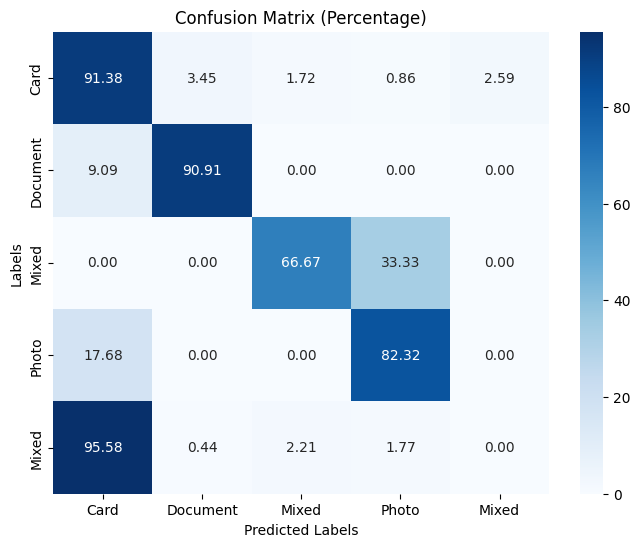

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df = pd.read_csv('C:\\Users\\ChNa395\\python\\outputlist_modified.csv')

# true_labels = df['labelInt']
# predicted_labels = df['predicted_label_int']

conf_matrix = confusion_matrix(df['labelInt'], df['predicted_label_int'])
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")


conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=Label, yticklabels=Label)
plt.xlabel('Predicted Labels')
plt.ylabel('Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step


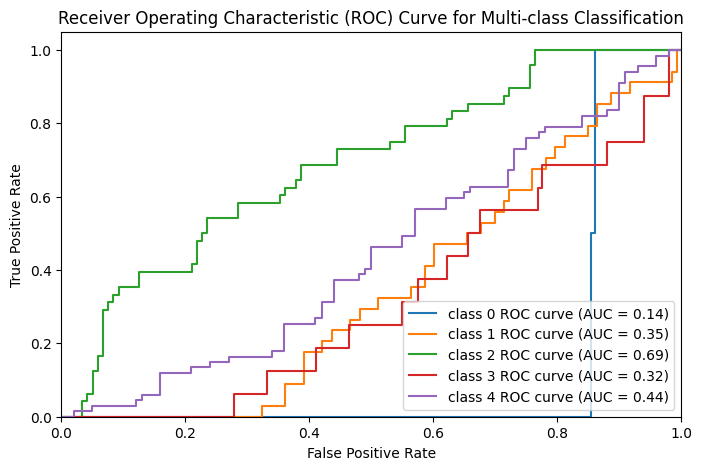

In [31]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc
from datetime import datetime
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

def plot_learning_curves(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (448, 448))
    img = img / 255.0
    return img

def load_and_preprocess_images_from_csv(csv_file, input_dir):
    df = pd.read_csv(csv_file)
    images = []
    labels = []
    for _, row in df.iterrows():
        image_path = os.path.join(input_dir, row['Filename'].strip() + '.png')
        img = load_and_preprocess_image(image_path)
        images.append(img)
        labels.append(row['Label'])
    return train_test_split(np.array(images), np.array(labels), test_size=0.3, random_state=42)

csvFile = "C:\\Users\\ChNa395\\python\\DeskewedCsv.csv"
input_dir = "C:\\Users\\ChNa395\\python\\BatchRun\\Dump\\AllTargetsDump\\DeskewedTargets"
x_train, x_test, y_train, y_test = load_and_preprocess_images_from_csv(csvFile, input_dir)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in sss.split(x_train, y_train):
    X_train_final, X_val = x_train[train_index], x_train[val_index]
    y_train_final, y_val = y_train[train_index], y_train[val_index]



encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_final)
y_val = encoder.transform(y_val)


y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

model = load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified.keras')

for layer in model.layers[:-2]: 
    layer.trainable = False

for layer in model.layers[-2:]:  
    layer.trainable = True

model.compile(optimizer='adam',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



y_test_encoded = encoder.fit_transform(y_test)
y_test_encoded = to_categorical(y_test_encoded)
y_pred = model.predict(x_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes



# Plot ROC curve
plt.figure(figsize=(8, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class {i} ROC curve (AUC = {roc_auc[i]:0.2f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class Classification')
plt.legend(loc='lower right')
plt.show()

(167, 5)
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step


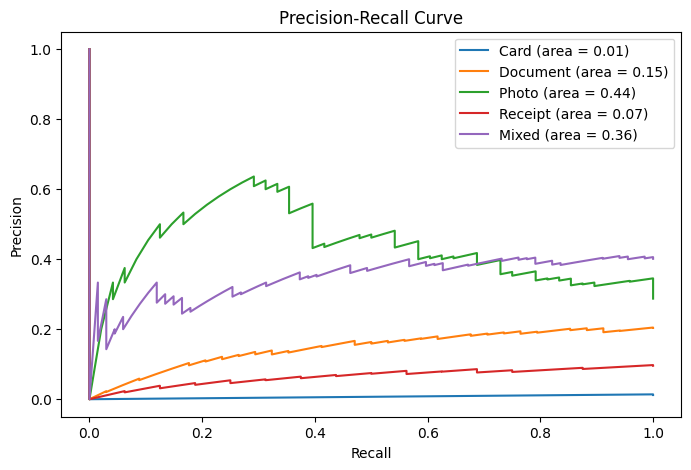

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_test_encoded = np.argmax(y_test)
y_test_encoded = encoder.fit_transform(y_test)
# y_test_encoded = np.array(y_test_encoded)
y_test_encoded = to_categorical(y_test_encoded)
print(y_test_encoded.shape)

# Predict on the test data
y_pred = model.predict(x_test)
# y_pred = np.array(y_pred)
# Initialize dictionaries to store precision, recall, and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision-recall curve and average precision for each class
for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_test_encoded[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test_encoded[:, i], y_pred[:, i])
class_names = ['Card', 'Document', 'Photo', 'Receipt', 'Mixed']
# Plot the precision-recall curve for each class
plt.figure(figsize=(8, 5))
for i in range(5):
    # plt.plot(recall[i], precision[i], label='class {0} (area = {1:0.2f})'.format(i, average_precision[i]))
    plt.plot(recall[i], precision[i], label=f'{class_names[i]} (area = {average_precision[i]:0.2f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.0219 - loss: 5.6960 - val_accuracy: 0.0256 - val_loss: 3.7364
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.0459 - loss: 3.1682 - val_accuracy: 0.1923 - val_loss: 1.9202
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3640 - loss: 1.8588 - val_accuracy: 0.6795 - val_loss: 1.3630
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.6707 - loss: 1.3949 - val_accuracy: 0.7436 - val_loss: 1.1575
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7218 - loss: 1.1456 - val_accuracy: 0.7821 - val_loss: 1.0229
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7698 - loss: 0.9382 - val_accuracy: 0.8205 - val_loss: 0.9010
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7542 - loss: 0.9816 - val_accuracy: 0.8462 - val_loss: 0.7951
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7663 - loss: 0.7808 - val_accuracy: 0.8462 - val_loss:

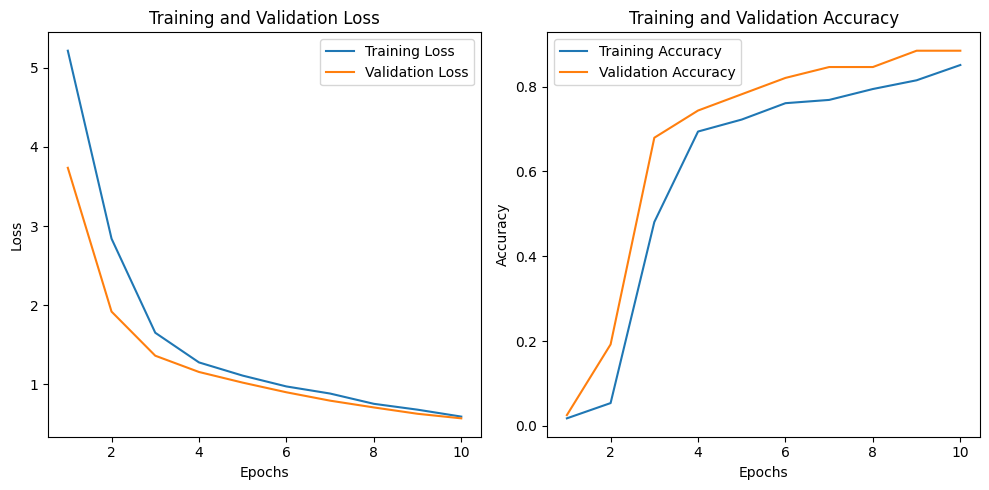

In [15]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from datetime import datetime
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

def plot_learning_curves(history):

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Extract training and validation accuracy
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

def load_and_preprocess_image(image_path):
    # print(image_path, "Process")
    img = cv2.imread(image_path)
    img = cv2.resize(img, (448, 448))
    img = img / 255.0
    return img

def load_and_preprocess_images_from_csv(csv_file, input_dir):
    df = pd.read_csv(csv_file)
    images = []
    labels = []
    for _, row in df.iterrows():
        image_path = os.path.join(f"{input_dir}", row['Filename'].strip() + '.png')
        # print(image_path) 
        img = load_and_preprocess_image(image_path)
        # if img is None:
        #     print(f'Failed to load image from {image_path}')
        #     continue
        images.append(img)
        labels.append(row['Label'])
    return train_test_split(np.array(images), np.array(labels), test_size=0.3, random_state=42)

csvFile = "C:\\Users\\ChNa395\\python\\DeskewedCsv.csv"
input_dir = "C:\\Users\\ChNa395\\python\\BatchRun\\Dump\\AllTargetsDump\\DeskewedTargets"
x_train, x_test, y_train, y_test = load_and_preprocess_images_from_csv(csvFile, input_dir)

# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Splitting the training set further into training and validation sets
for train_index, val_index in sss.split(x_train, y_train):
    X_train_final, X_val = x_train[train_index], x_train[val_index]
    y_train_final, y_val = y_train[train_index], y_train[val_index]

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# log_dir = "C:\\Users\\ChNa395\\python\\DATA\\logsDir" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


model = load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified.keras')



# Freezing the CNN layers (assuming they are the initial layers)
for layer in model.layers[:-2]: 
    layer.trainable = False

# Making sure the FCN layers are trainable
train_labels = {'Document': 0, 'Receipt': 1, 'Card': 2, 'Photo': 3, 'Mixed': 4}
val_labels = {'Document': 0, 'Receipt': 1, 'Card': 2, 'Photo': 3, 'Mixed': 4}
for layer in model.layers[-2:]:  
    layer.trainable = True

# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary to verify trainable status
# model.summary()

# Train the model with your data
history = model.fit(x_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
plot_learning_curves(history)
model.save("C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified_trained.keras")

In [16]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_test = to_categorical(y_test)
print(model.evaluate(x_test, y_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7747 - loss: 0.7204
[0.7713882327079773, 0.7904191613197327]


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


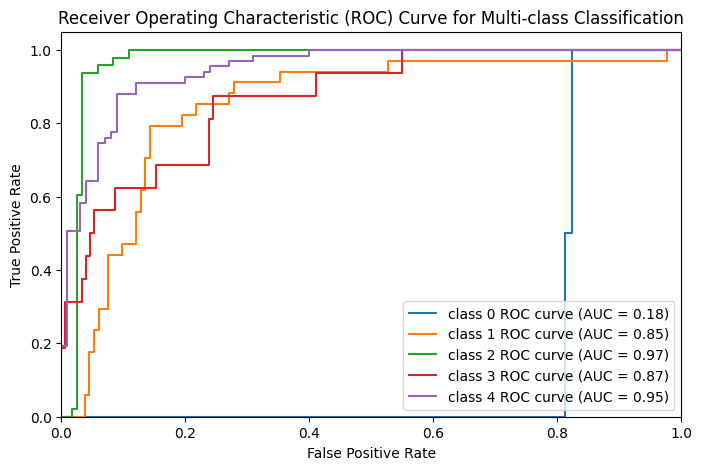

In [17]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test data
model = load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified_trained.keras')
y_pred = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes



# Plot ROC curve
plt.figure(figsize=(8, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class {i} ROC curve (AUC = {roc_auc[i]:0.2f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class Classification')
plt.legend(loc='lower right')
plt.show()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.7580 - loss: 0.8130 - val_accuracy: 0.7821 - val_loss: 0.8069
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7997 - loss: 0.6439 - val_accuracy: 0.8205 - val_loss: 0.7256
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8505 - loss: 0.5314 - val_accuracy: 0.8462 - val_loss: 0.6676
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8750 - loss: 0.4884 - val_accuracy: 0.8333 - val_loss: 0.6179
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8611 - loss: 0.4759 - val_accuracy: 0.8333 - val_loss: 0.5738
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9214 - loss: 0.3841 - val_accuracy: 0.8333 - val_loss: 0.5399
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9376 - loss: 0.3059 - val_accuracy: 0.8333 - val_loss: 0.5078
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9445 - loss: 0.2775 - val_accuracy: 0.8333 - val_loss:

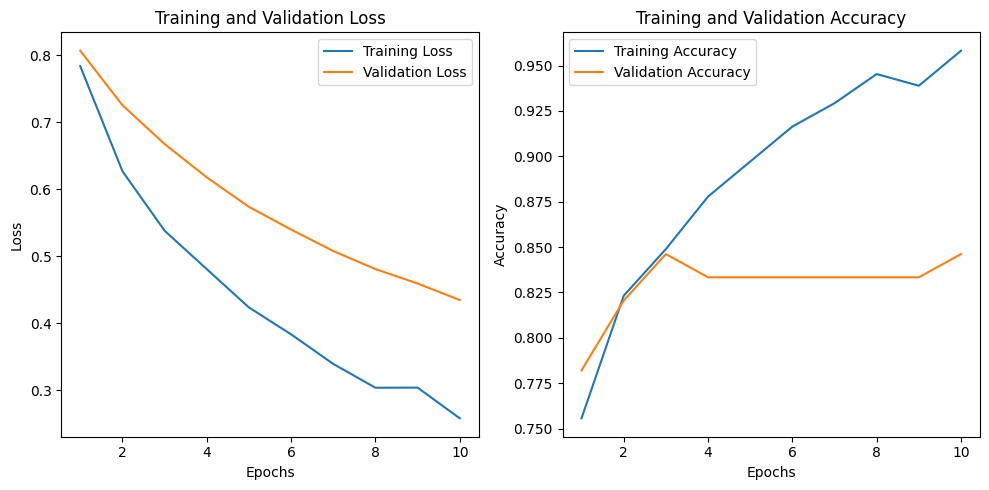

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8345 - loss: 0.4597
[0.5147960782051086, 0.8383233547210693]


In [18]:
# encoder = LabelEncoder()
# y_test = encoder.fit_transform(y_test)
# y_test = to_categorical(y_test)
# print(model.evaluate(x_test, y_test))


import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from datetime import datetime
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

def plot_learning_curves(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (448, 448))
    img = img / 255.0
    return img

def load_and_preprocess_images_from_csv(csv_file, input_dir):
    df = pd.read_csv(csv_file)
    images = []
    labels = []
    for _, row in df.iterrows():
        image_path = os.path.join(input_dir, row['Filename'].strip() + '.png')
        img = load_and_preprocess_image(image_path)
        images.append(img)
        labels.append(row['Label'])
    return train_test_split(np.array(images), np.array(labels), test_size=0.3, random_state=42)

csvFile = "C:\\Users\\ChNa395\\python\\DeskewedCsv.csv"
input_dir = "C:\\Users\\ChNa395\\python\\BatchRun\\Dump\\AllTargetsDump\\DeskewedTargets"
x_train, x_test, y_train, y_test = load_and_preprocess_images_from_csv(csvFile, input_dir)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in sss.split(x_train, y_train):
    X_train_final, X_val = x_train[train_index], x_train[val_index]
    y_train_final, y_val = y_train[train_index], y_train[val_index]

# Augmentation
seq = iaa.Sequential([
    iaa.Rotate((5, 5)),
    iaa.ChannelShuffle(1.0),
    iaa.Flipud(1.0)
])

def augment_images(images, labels, augmenter):
    augmented_images = augmenter(images=images)
    return np.array(augmented_images), labels

X_train_aug, y_train_aug = augment_images(X_train_final, y_train_final, seq)
X_val_aug, y_val_aug = augment_images(X_val, y_val, seq)

encoder = LabelEncoder()
y_train_aug = encoder.fit_transform(y_train_aug)
y_val_aug = encoder.transform(y_val_aug)
y_test_encoded = encoder.transform(y_test)

y_train_aug = to_categorical(y_train_aug)
y_val_aug = to_categorical(y_val_aug)
y_test_encoded = to_categorical(y_test_encoded)

model = load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified_trained.keras')

for layer in model.layers[:-2]: 
    layer.trainable = False

for layer in model.layers[-2:]:  
    layer.trainable = True

model.compile(optimizer='adam',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train_aug, y_train_aug, validation_data=(X_val_aug, y_val_aug), epochs=10, batch_size=32)
plot_learning_curves(history)

print(model.evaluate(x_test, y_test_encoded))


In [52]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)          │ (None, 448, 448, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 449, 449, 3)       │               0 │ input_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 224, 224, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 224, 224, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 224, 224, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Multiply)    │ (None, 224, 224, 32)      │               0 │ activation_1[0][0],        │
│                               │                           │                 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 224, 224, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 224, 224, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 224, 224, 32)      │               0 │ block1a_bn[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation (Multiply) │ (None, 224, 224, 32)      │               0 │ activation_2[0][0],        │
│                               │                           │                 │ block1a_bn[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 1, 1, 8)           │               0 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_swish_se_reduce       │ (None, 1, 1, 8)           │               

 Total params: 4,821,421 (18.39 MB)

 Trainable params: 257,285 (1005.02 KB)

 Non-trainable params: 4,049,564 (15.45 MB)

 Optimizer params: 514,572 (1.96 MB)

In [20]:
from sklearn.metrics import classification_report

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test_encoded to class labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Create a mapping of class labels
class_names = ['Card', 'Document', 'Photo', 'Receipt', 'Mixed']

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names, zero_division = 1)

print(report)

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
              precision    recall  f1-score   support

        Card       1.00      0.00      0.00         2
    Document       0.77      0.71      0.74        34
       Photo       0.91      0.88      0.89        48
     Receipt       1.00      0.81      0.90        16
       Mixed       0.79      0.91      0.85        67

    accuracy                           0.84       167
   macro avg       0.90      0.66      0.68       167
weighted avg       0.85      0.84      0.83       167



6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
Accuracy: 83.83%


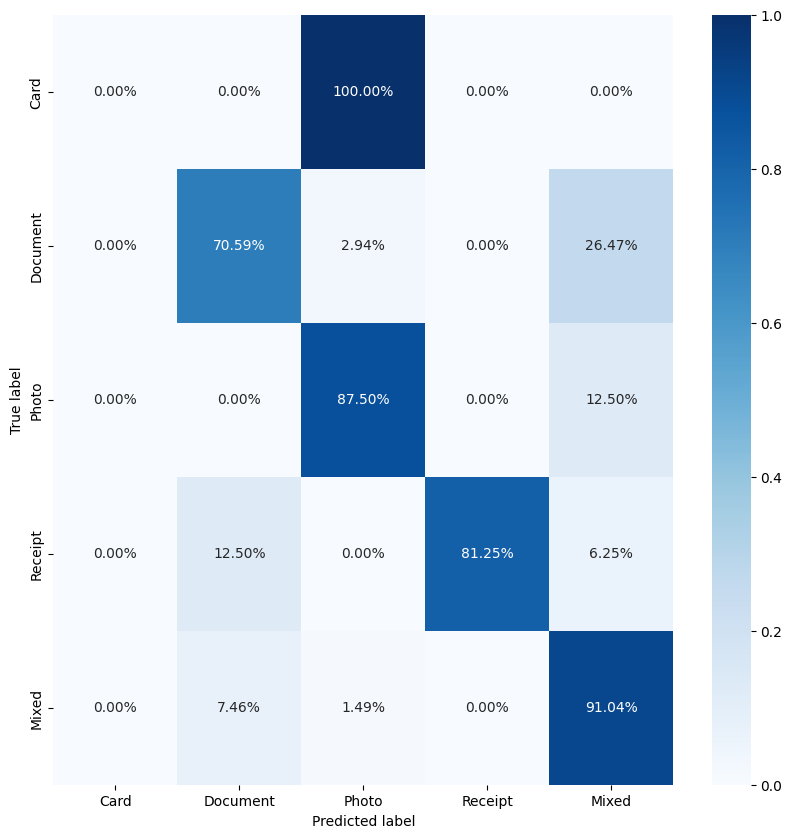

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test_encoded to class labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Convert to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy * 100:.2f}%")
# Create a mapping of class labels
class_names = ['Card', 'Document', 'Photo', 'Receipt', 'Mixed']

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2%", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


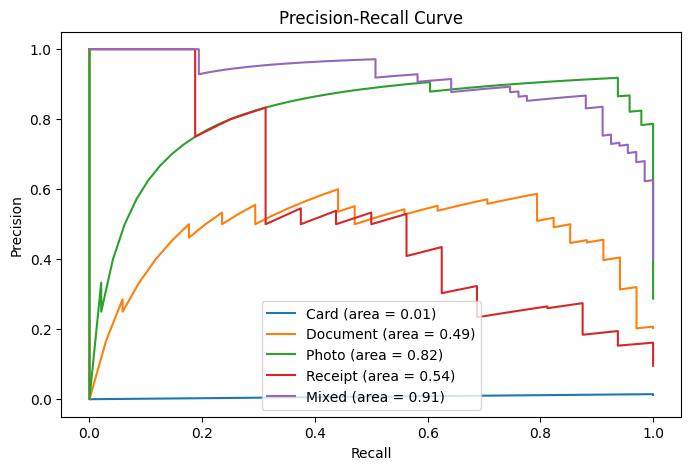

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import load_model

# Load the model
model = load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified_trained.keras')

# Preprocess y_test (ensure y_test is encoded in one-hot format)
encoder = LabelEncoder()
# y_test_encoded = np.argmax(y_test, axis=1)
y_test_encoded = encoder.fit_transform(y_test)
y_test_encoded = to_categorical(y_test_encoded)

# Predict on the test data
y_pred = model.predict(x_test)

# Initialize dictionaries to store precision, recall, and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision-recall curve and average precision for each class
for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_test_encoded[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test_encoded[:, i], y_pred[:, i])
class_names = ['Card', 'Document', 'Photo', 'Receipt', 'Mixed']
# Plot the precision-recall curve for each class
plt.figure(figsize=(8, 5))
for i in range(5):
    # plt.plot(recall[i], precision[i], label='class {0} (area = {1:0.2f})'.format(i, average_precision[i]))
    plt.plot(recall[i], precision[i], label=f'{class_names[i]} (area = {average_precision[i]:0.2f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


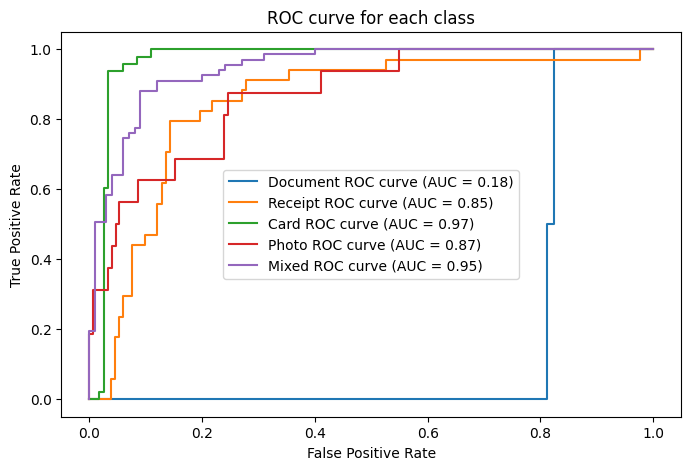

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(x_test)

class_names = ['Document', 'Receipt', 'Card', 'Photo', 'Mixed']
# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} ROC curve (AUC = {roc_auc[i]:0.2f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each class')
plt.legend(loc='best')
plt.show()


In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten


# Load the existing model
model = load_model('C:\\Users\\ChNa395\\Downloads\\doc_classification\\doc_classification_modified_trained.keras')

# Freeze the CNN layers (assuming they are the initial layers)
for layer in model.layers[:-2]:
    layer.trainable = False

# Define a HyperModel by subclassing
def build(self, hp):
    # Hyperparameters to tune
    dense_units = hp.Int('units', min_value=32, max_value=512, step=32)
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

    # Building the FCN with tuned hyperparameters
    x = self.base_model.layers[-3].output  # Assuming the last 3 layers are FCN
    x = Flatten()(x)  # Flatten the output of the base model
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(5, activation='softmax')(x)

    model = tf.keras.Model(inputs=self.base_model.input, outputs=outputs)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


train_labels = {'Document': 0, 'Receipt': 1, 'Card':2, 'Photo': 3, 'Mixed': 4}
# Define the MyHyperModel class
class MyHyperModel(HyperModel):
    def __init__(self, base_model):
        self.base_model = base_model

    def build(self, hp):
        # Hyperparameters to tune
        dense_units = hp.Int('units', min_value=32, max_value=512, step=32)
        dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

        # Building the FCN with tuned hyperparameters
        x = self.base_model.layers[-5].output  # Assuming the last 3 layers are FCN
        x = Flatten()(x)  # Flatten the output of the base model
        x = Dense(dense_units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
        outputs = Dense(5, activation='softmax')(x)

        model = tf.keras.Model(inputs=self.base_model.input, outputs=outputs)

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

val_labels = {'Document': 0, 'Receipt': 1, 'Card':2, 'Photo': 3, 'Mixed': 4}

# Instantiate the HyperModel
hypermodel = MyHyperModel(base_model=model)

# Initialize the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,  # Set the number of trials to run
    executions_per_trial=1,
    directory='C:\\Users\\ChNa395\\OneDrive - HP Inc\\Jupyter Notebook\\my_dir',  # Directory to store logs
    project_name='hparam_tuning'
)

# Summary of the tunable model
tuner.search_space_summary()

# Start hyperparameter search
tuner.search(X_train_aug, y_train_aug,
             epochs=10,
             validation_data=(X_val_aug, y_val_aug))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

Trial 10 Complete [00h 06m 35s]
val_accuracy: 0.9615384340286255

Best val_accuracy So Far: 0.9615384340286255
Total elapsed time: 01h 00m 04s


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_1             │ (None, 448, 448,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 449, 449,  │          0 │ input_1[0][0]     │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 224, 224,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 224, 224,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 224, 224,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 224, 224,  │          0 │ activation_1[0][… │
│ (Multiply)          │ 32)               │            │ stem_bn[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 224, 224,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 224, 224,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 224, 224,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 224, 224,  │          0 │ activation_2[0][… │
│ (Multiply)          │ 32)               │            │ block1a_bn[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 1, 1, 8)   │          0 │ block1a_se_reduc… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_swish_se_r… │ (None, 1, 1, 8)   │          0 │ activation_3[0][… │
│ (Multiply)          │                   │            │ block1a_se_reduc… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_swish_se… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 224, 224,  │          0 │ block1a_activati

 Total params: 92,361,441 (352.33 MB)

 Trainable params: 88,311,877 (336.88 MB)

 Non-trainable params: 4,049,564 (15.45 MB)